In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_train.csv')

In [3]:
df.shape

(100514, 19)

- __Loan ID__ primary key
- __Customer ID__ primary key
- __Loan Status__
        - A charge-off occurs when you don't pay the full minimum payment on a debt for several months and your creditor writes it off as a bad debt.
        - A __‘fully paid’__ loan has been repaid in full including all principal and interest payments
- __Current Loan Amount__ of money requested by the borrower
- A __Term loan__ is a loan from a bank for a specific amount that has a specified repayment schedule and either a fixed or floating interest rate. 
- A __credit score__ is a number ranging from 300-850 that depicts a consumer's creditworthiness. The higher the credit score, the more attractive the borrower. A credit score is based on credit history
- __Annualized income__ is an estimate of the sum of money that an individual or a business generates over a year's time
- __Years in current job__ 
- __Home ownership__
        - __Home Mortgage__ loan given by a bank
        - __Own Home__  is a contract between a borrower and a lender that allows someone to borrow money to buy a house
        - __Rent__  you rent a home for a certain amount of time, with the option to buy it before the lease expires. Rent to own agreements consist of two parts: a standard lease agreement and an option to buy.
        - __HaveMortgage__  is a loan in which property or real estate is used as collateral. The borrower enters into an agreement with the lender (usually a bank) wherein the borrower receives cash upfront then makes payments over a set time span until he pays back the lender in full
- __Purpose__ (Home Improvements', 'Debt Consolidation/refinnancing', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy')
- __Monthly debt__ 
- __Years of credit history__ The “length of credit history
- __Months since last delinquent__ where a borrower is late or overdue on a payment
- __Number of Credit Problems__
- __Current Credit Balance amount__ you currently still owe on the loan according to the date of your statement
- __Maximum Open Credit maximum__ loan amount the customer can borrow
- __Bankruptcies__ is the legal proceeding involving a person or business that is unable to repay outstanding debts
- __Tax Liens__  is a legal claim against the assets of an individual or business who fails to pay taxes owed to the government

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [6]:
df.tail(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Many NaN Values in tail data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
df.describe(include='O')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,db0342fa-9ca4-41de-a567-d327d956c434,654b44dc-e98b-4417-adf6-f9881a3a7742,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


In [10]:
temp=[]
for i in df.columns:
    temp.append([i,str(df[i].dtype),df[i].isna().sum(),round(((df[i].isna().sum())/len(df[i]))*100,2),
                df[i].nunique(),df[i].drop_duplicates().sample(2).values])
newdf = pd.DataFrame(temp, columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])
newdf

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Loan ID,object,514,0.51,81999,"[0791bb70-75d2-4603-935d-b5d9ec757ad1, 4cfe95c..."
1,Customer ID,object,514,0.51,81999,"[5b56ed28-90f9-4798-85f8-d24ffadeef2a, c888a69..."
2,Loan Status,object,514,0.51,2,"[Fully Paid, Charged Off]"
3,Current Loan Amount,float64,514,0.51,22004,"[130570.0, 377696.0]"
4,Term,object,514,0.51,2,"[Short Term, Long Term]"
5,Credit Score,float64,19668,19.57,324,"[697.0, 598.0]"
6,Annual Income,float64,19668,19.57,36174,"[1011085.0, 2707880.0]"
7,Years in current job,object,4736,4.71,11,"[2 years, nan]"
8,Home Ownership,object,514,0.51,4,"[Own Home, nan]"
9,Purpose,object,514,0.51,16,"[Buy House, Buy a Car]"


In [11]:
# categorical columns
print(df['Purpose'].value_counts())
print('\n')
print('=================================')
print(df['Loan Status'].value_counts())
print('\n')
print('=================================')
print(df['Term'].value_counts())

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64


Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64


Short Term    72208
Long Term     27792
Name: Term, dtype: int64


In [12]:
df.isna().sum().sort_values(ascending=False)
# Missing value terbanyak dari columns Months since last delinquent

Months since last delinquent    53655
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Bankruptcies                      718
Tax Liens                         524
Maximum Open Credit               516
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Purpose                           514
Home Ownership                    514
Monthly Debt                      514
Years of Credit History           514
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Loan ID                           514
dtype: int64

>### Handle Missing Value

In [13]:
# karena columns Monts missing value 53% saya memilih drop columns beserta primary key dataset (Loan Id dan Customer ID)
df.drop(['Months since last delinquent','Loan ID','Customer ID'], axis=1, inplace=True)

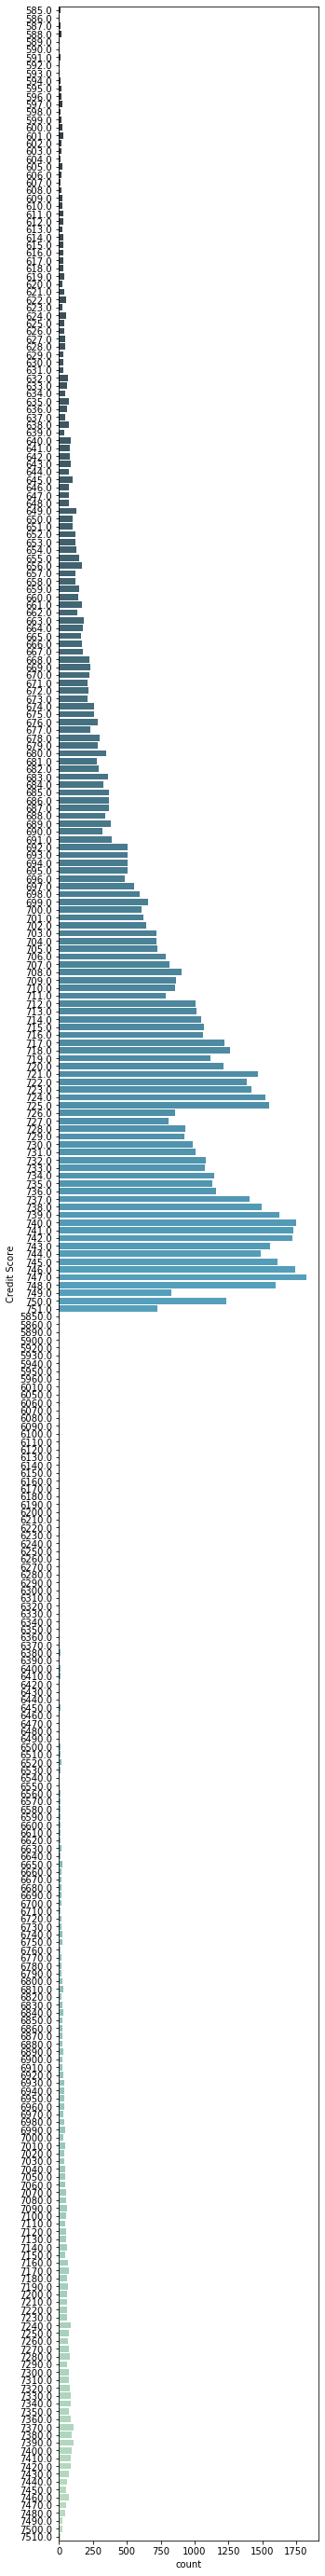

In [14]:
# Missing Value terbanyak kedua 19% (Credit Score)
plt.figure(figsize=(5,50))
sns.countplot(data=df, y='Credit Score', palette='GnBu_d')
plt.show()

In [15]:
df['Credit Score'].mean()

1076.4560893550702

- Nilai tertinggi Credit Score di 747 dan rata2 terdapat di 703-751(Bar Biru)

In [16]:
df['Credit Score'].fillna(value=df['Credit Score'].mean(), inplace=True)

In [17]:
df['Credit Score'].isnull().sum()

0

In [18]:
# Missing Value terbanyak ketiga 19% (Annual Income)
df['Annual Income'].fillna(value=df['Annual Income'].mean(), inplace=True)
df['Annual Income'].isnull().sum()

0

In [19]:
df.columns


Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

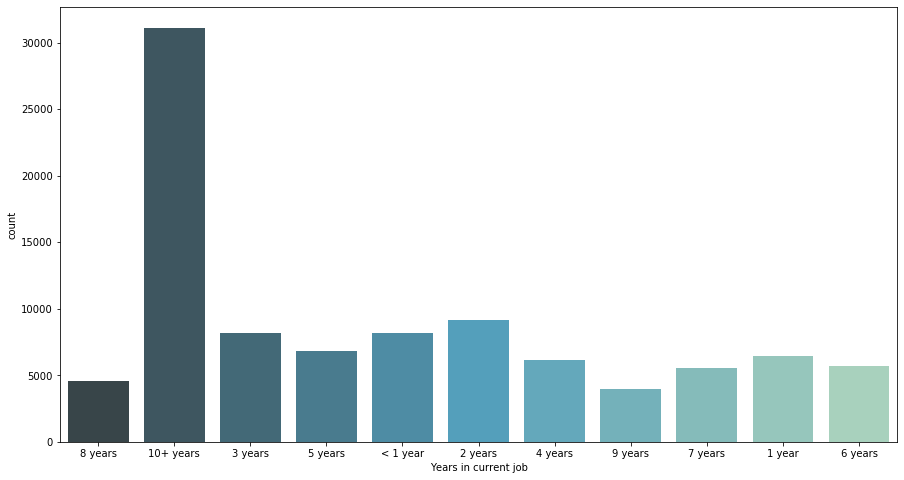

In [20]:
# Mengisi column nan value Years Current Job 5%
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Years in current job', palette='GnBu_d')
plt.show()

- Data terbanyak yang bekerja lebih dari 10 tahun ada di 10+years

In [21]:
# mengisi nan value years in current job dengan value terbesar 10+ years
df['Years in current job'].fillna(value='10+ years', inplace=True)

In [22]:
df['Years in current job'].isnull().sum()

0

In [23]:
# mengisi nan value Bankruptcies dengan value terbesar 0.0
df['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

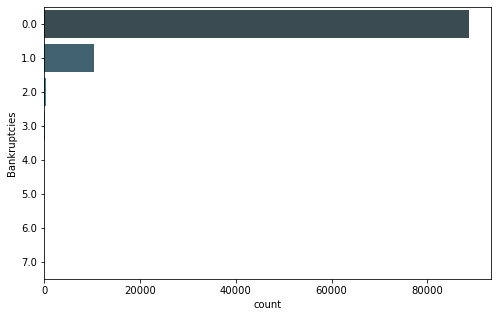

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Bankruptcies', palette='GnBu_d')
plt.show()

In [25]:
df['Bankruptcies'].fillna(value='0.0', inplace=True)
df['Bankruptcies'].isnull().sum()

0

In [26]:
# mengisi nan value Tax Liens dengan value terbesar 0.0
df['Tax Liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [27]:
df['Tax Liens'].fillna(value='0.0', inplace=True)
df['Tax Liens'].isnull().sum()

0

In [28]:
# mengisi nan value Maximum Open Credit dengan value terbesar 0.0
df['Maximum Open Credit'].value_counts()

0.0          681
237204.0      13
246136.0      12
201652.0      12
236412.0      12
            ... 
401060.0       1
961334.0       1
879318.0       1
1246740.0      1
887282.0       1
Name: Maximum Open Credit, Length: 44596, dtype: int64

In [29]:
df['Maximum Open Credit'].fillna(value='0.0', inplace=True)
df['Maximum Open Credit'].isnull().sum()

0

In [30]:
# mengisi nan value Loan status dengan value terbesar Fully Paid
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [31]:
df['Loan Status'].fillna(value='Fully Paid', inplace=True)
df['Loan Status'].isnull().sum()

0

In [32]:
# mengisi nan value Current Loan Amount dengan value terbesar 99999999.0
df['Current Loan Amount'].value_counts()

99999999.0    11484
223322.0         27
223102.0         27
223652.0         27
216194.0         27
              ...  
602008.0          1
457864.0          1
601986.0          1
95216.0           1
114686.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

In [33]:
df['Current Loan Amount'].fillna(value='99999999.0', inplace=True)
df['Current Loan Amount'].isnull().sum()

0

In [34]:
# mengisi nan value Term dengan value terbesar Short Term
df['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [35]:
df['Term'].fillna(value='Short Term', inplace=True)
df['Term'].isnull().sum()

0

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64




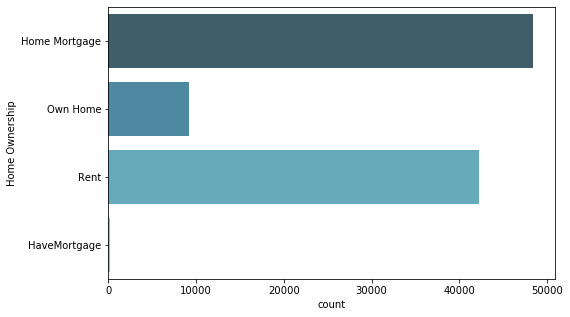

Missing value  : 0


In [36]:
# mengisi nan value Home Ownership dengan value terbesar Home Mortgage
print(df['Home Ownership'].value_counts())
print('\n')
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Home Ownership', palette='GnBu_d')
plt.show()

df['Home Ownership'].fillna(value='Home Mortgage', inplace=True)
x = df['Home Ownership'].isnull().sum()
print(f'Missing value  : {x}')

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64




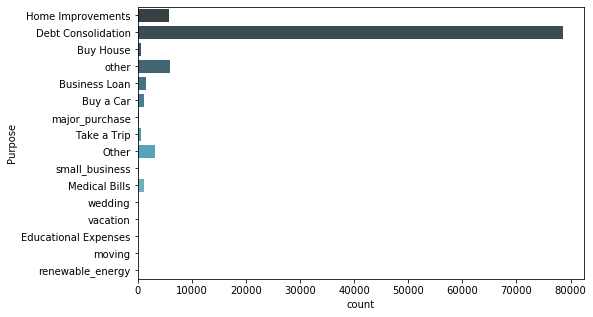

Missing value  : 0


In [37]:
# mengisi nan value Purpose  dengan value terbesar Debt Consolidation
print(df['Purpose'].value_counts())
print('\n')
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Purpose', palette='GnBu_d')
plt.show()

df['Purpose'].fillna(value='Debt Consolidation', inplace=True)
a = df['Purpose'].isnull().sum()
print(f'Missing value  : {a}')

In [38]:
# mengisi nan value Monthly Debt dengan value terbesar 0.00
print(df['Monthly Debt'].value_counts())
print('\n')
df['Monthly Debt'].fillna(value='0.00', inplace=True )
b = df['Monthly Debt'].isnull().sum()
print(f'Missing value  : {b}')

0.00        74
15903.00     9
11162.88     9
16279.20     8
12656.47     8
            ..
8573.56      1
26028.29     1
17368.85     1
23404.58     1
30723.00     1
Name: Monthly Debt, Length: 65765, dtype: int64


Missing value  : 0


In [39]:
# mengisi nan value Years of Credit History dengan value terbesar 16.0
print(df['Years of Credit History'].value_counts())
print('\n')
df['Years of Credit History'].fillna(value='16.0', inplace=True )
x = df['Years of Credit History'].isnull().sum()
print(f'Missing value  : {x}')

16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
59.9       1
51.4       1
58.0       1
53.8       1
52.2       1
Name: Years of Credit History, Length: 506, dtype: int64


Missing value  : 0


In [40]:
# mengisi nan value Number of Open Accounts dengan value terbesar 9.0
print(df['Number of Open Accounts'].value_counts().head(5))
print('\n')
df['Number of Open Accounts'].fillna(value='9.0', inplace=True  )
x = df['Number of Open Accounts'].isnull().sum()
print(f'Missing value  : {x}')

9.0     9360
10.0    9012
8.0     8792
11.0    8601
7.0     8090
Name: Number of Open Accounts, dtype: int64


Missing value  : 0


0.0     86035
1.0     12077
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
9.0         2
11.0        2
10.0        2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64




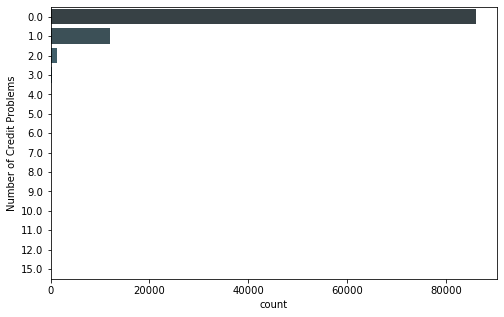

Missing value  : 0


In [41]:
# mengisi nan value Number of Credit Problems dengan value terbesar 0.0
print(df['Number of Credit Problems'].value_counts())
print('\n')
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Number of Credit Problems',palette='GnBu_d')
plt.show()
df['Number of Credit Problems'].fillna(value='0.0', inplace=True  )
x = df['Number of Credit Problems'].isnull().sum()
print(f'Missing value  : {x}')

In [42]:
# mengisi nan value Current Credit Balance dengan value terbesar 0.0
print(df['Current Credit Balance'].value_counts())
print('\n')
df['Current Credit Balance'].fillna(value='0.0', inplace=True  )
x = df['Current Credit Balance'].isnull().sum()
print(f'Missing value  : {x}')

0.0         572
67697.0      17
175978.0     17
65683.0      17
88426.0      16
           ... 
573287.0      1
632225.0      1
747137.0      1
356402.0      1
276260.0      1
Name: Current Credit Balance, Length: 32730, dtype: int64


Missing value  : 0


>### Data Clear from missing values


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
Loan Status                  100514 non-null object
Current Loan Amount          100514 non-null object
Term                         100514 non-null object
Credit Score                 100514 non-null float64
Annual Income                100514 non-null float64
Years in current job         100514 non-null object
Home Ownership               100514 non-null object
Purpose                      100514 non-null object
Monthly Debt                 100514 non-null object
Years of Credit History      100514 non-null object
Number of Open Accounts      100514 non-null object
Number of Credit Problems    100514 non-null object
Current Credit Balance       100514 non-null object
Maximum Open Credit          100514 non-null object
Bankruptcies                 100514 non-null object
Tax Liens                    100514 non-null object
dtypes: float64(2), object(14)
memory usage: 12.3+ MB


>##  Exploratory Data Analysis (EDA)

In [44]:
df = df.astype({'Current Loan Amount':'float64', 'Monthly Debt':'float64', 'Years of Credit History':'float64',
              'Number of Open Accounts':'float64', 'Number of Credit Problems':'float64', 'Current Credit Balance':'float64',
               'Maximum Open Credit':'float64', 'Bankruptcies':'float64', 'Tax Liens':'float64'})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
Loan Status                  100514 non-null object
Current Loan Amount          100514 non-null float64
Term                         100514 non-null object
Credit Score                 100514 non-null float64
Annual Income                100514 non-null float64
Years in current job         100514 non-null object
Home Ownership               100514 non-null object
Purpose                      100514 non-null object
Monthly Debt                 100514 non-null float64
Years of Credit History      100514 non-null float64
Number of Open Accounts      100514 non-null float64
Number of Credit Problems    100514 non-null float64
Current Credit Balance       100514 non-null float64
Maximum Open Credit          100514 non-null float64
Bankruptcies                 100514 non-null float64
Tax Liens                    100514 non-null float64
dtypes: float64(11), object(5)
memory usage: 1

>### Detect Outlier

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
print(IQR)

Current Loan Amount          349052.000
Credit Score                     39.000
Annual Income                577543.000
Monthly Debt                  13848.245
Years of Credit History           8.100
Number of Open Accounts           6.000
Number of Credit Problems         0.000
Current Credit Balance       255355.250
Maximum Open Credit          509762.000
Bankruptcies                      0.000
Tax Liens                         0.000
dtype: float64


In [47]:
lower_limit.value_counts()

 0.0000         3
-343662.0000    1
-493977.0000    1
 1.3500         1
-271730.8750    1
 66110.5000     1
-10661.1375     1
-1.0000         1
 652.5000       1
dtype: int64

In [48]:
upper_limit.value_counts()

0.000000e+00    3
4.473184e+04    1
7.496901e+05    1
1.545071e+06    1
2.376282e+06    1
2.300000e+01    1
3.375000e+01    1
1.052546e+06    1
8.085000e+02    1
dtype: int64

In [49]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(43287, 16)

In [50]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43287 entries, 3 to 99998
Data columns (total 16 columns):
Loan Status                  43287 non-null object
Current Loan Amount          43287 non-null float64
Term                         43287 non-null object
Credit Score                 43287 non-null float64
Annual Income                43287 non-null float64
Years in current job         43287 non-null object
Home Ownership               43287 non-null object
Purpose                      43287 non-null object
Monthly Debt                 43287 non-null float64
Years of Credit History      43287 non-null float64
Number of Open Accounts      43287 non-null float64
Number of Credit Problems    43287 non-null float64
Current Credit Balance       43287 non-null float64
Maximum Open Credit          43287 non-null float64
Bankruptcies                 43287 non-null float64
Tax Liens                    43287 non-null float64
dtypes: float64(11), object(5)
memory usage: 5.6+ MB


- We have 43287 outlier data

>### Find Corellation

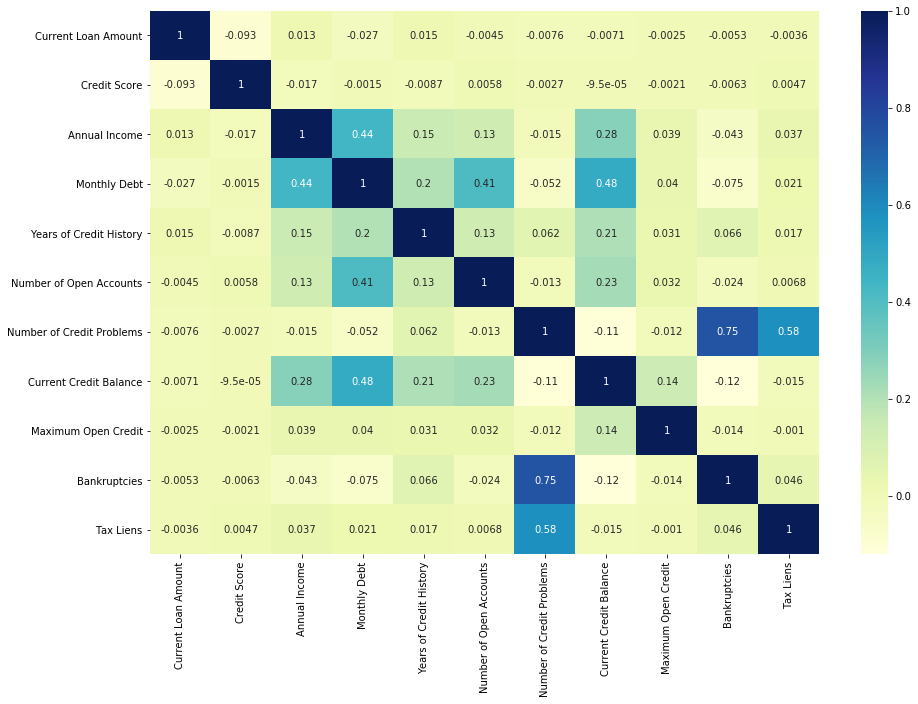

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

>### Distribution column Term and Credit score 

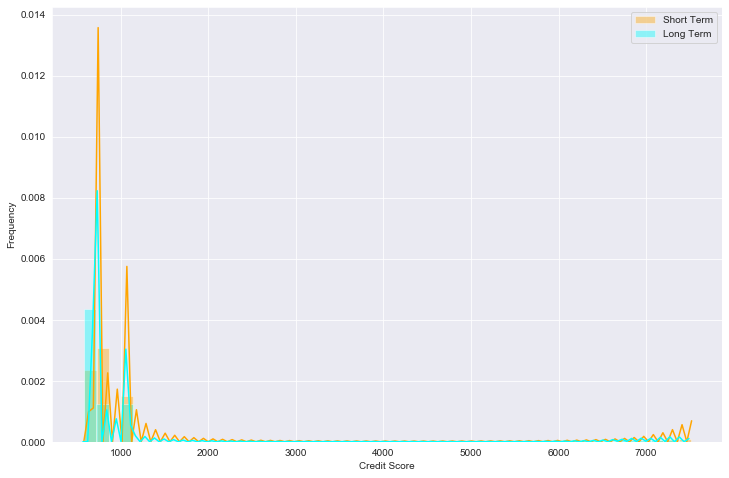

In [52]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df[df['Term'] == 'Short Term']['Credit Score'],color='orange', 
             label = 'Short Term')
sns.distplot(df[df['Term'] == 'Long Term']['Credit Score'],color='cyan',
            label = 'Long Term')
plt.legend()
plt.ylabel('Frequency')
plt.show()


In [55]:
from pingouin import pairwise_ttests

In [56]:
# paired or unpaired samples
# pairwise_ttests(data=df,dv='Credit Score', between='Term', parametric=False)

In [57]:
pairwise_ttests(data=df,dv='Credit Score', between='Term')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Term,Short Term,Long Term,False,True,-9.211,43604.03,two-sided,3.369400e-20,2.056e+16,-0.07


- Conclusion Punc 3.3 > 0.05 denied H0

>### Visualization

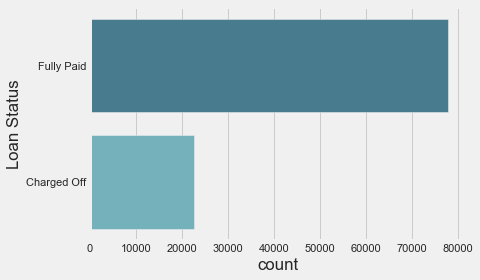

In [253]:
sns.countplot(data=df, y ='Loan Status', palette='GnBu_d')

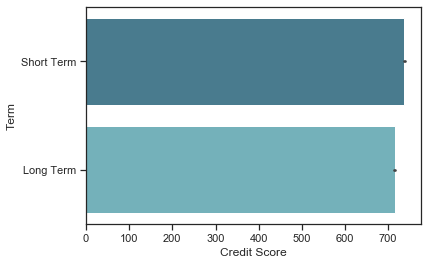

In [58]:
# median from credit score by term
sns.barplot(data=df, x ='Credit Score', y='Term',  estimator= np.median, palette='GnBu_d')

- Conclusion Creditor near equal in term have same median credit score

Text(0.5, 1.0, 'Mean Credit Score by Term')

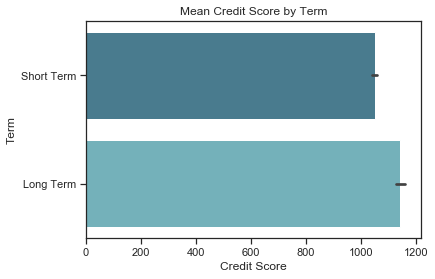

In [59]:
# mean from credit score by term
sns.barplot(data=df, x ='Credit Score', y='Term',  estimator= np.mean, palette='GnBu_d')
plt.title("Mean Credit Score by Term")

>### Contribution from Purpose to Credit Score

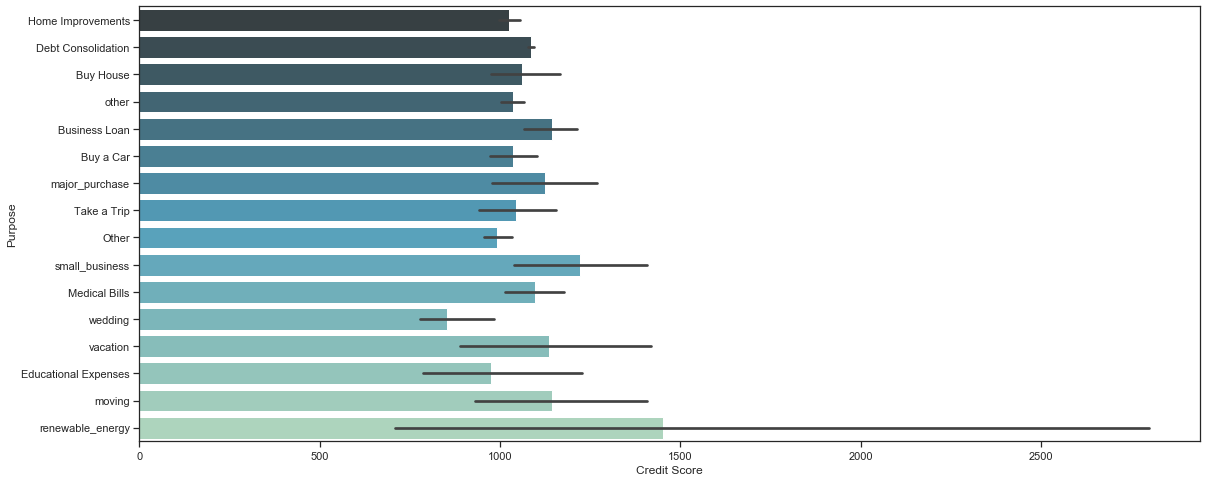

In [60]:
plt.figure(figsize=(19,8))
sns.barplot(data=df, x='Credit Score', y='Purpose', palette='GnBu_d')
plt.show()

- From purpose, renewable_energy have maximal credit score, for future maybe renewable is big purpose and make profitable
- Maybe renewable energy is new trend for future, have a big prospec
- And The second one is small bussines, maybe this bussines have money circle fast to complete loans

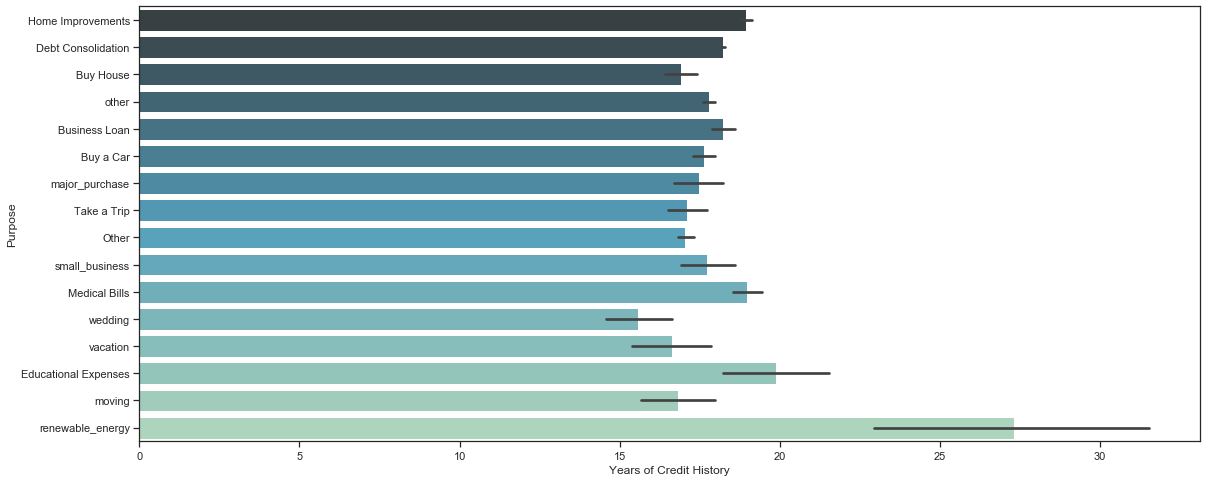

In [61]:
plt.figure(figsize=(19,8))
sns.barplot(data=df, x='Years of Credit History', y='Purpose', palette='GnBu_d')
plt.show()

- From years credit history, renewable_energy have good credit history, for future maybe renewable is big purpose and make profitable
- Maybe renewable energy is new trend for future, have a big prospec
- And The second one is educational expenses
- Third one is home improvements

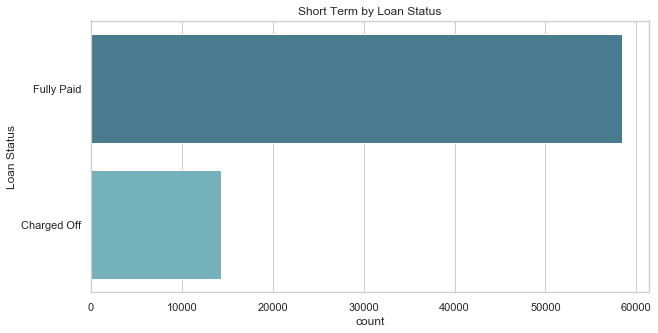

In [62]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(y='Loan Status', data=df[df['Term'] == 'Short Term'], palette='GnBu_d')
plt.title('Short Term by Loan Status')
plt.show()

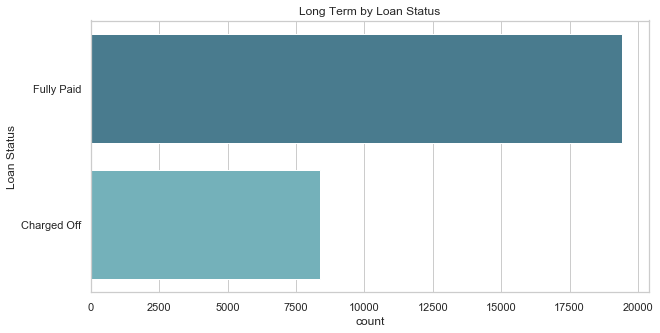

In [63]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(y='Loan Status', data=df[df['Term'] == 'Long Term'], palette='GnBu_d')
plt.title('Long Term by Loan Status')
plt.show()

- In long term have more Charged off than short term

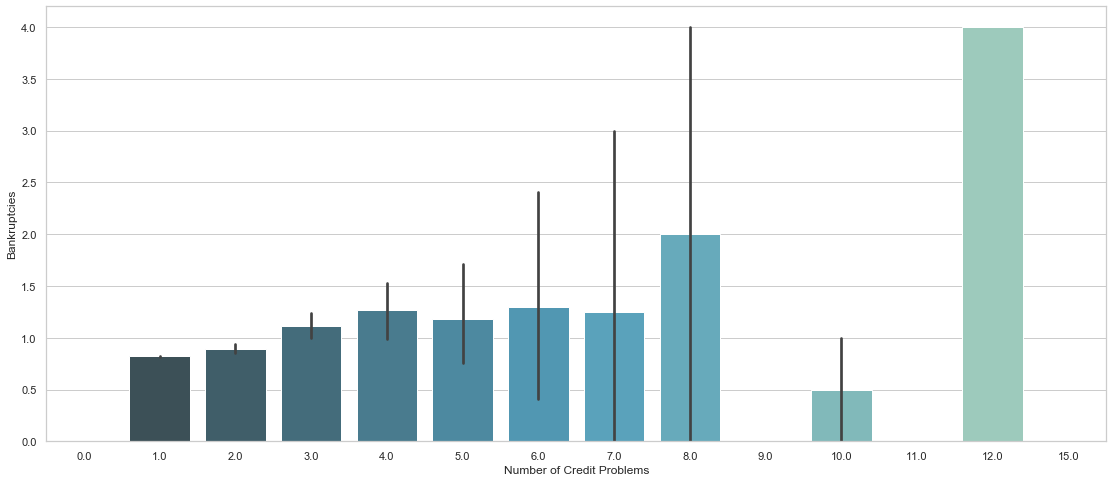

In [64]:
plt.figure(figsize=(19,8))
sns.barplot(data=df, x='Number of Credit Problems', y='Bankruptcies', palette='GnBu_d')
plt.show()

- Number of credit  problems 12.0 have maximum score from Bankruptcies 4.0

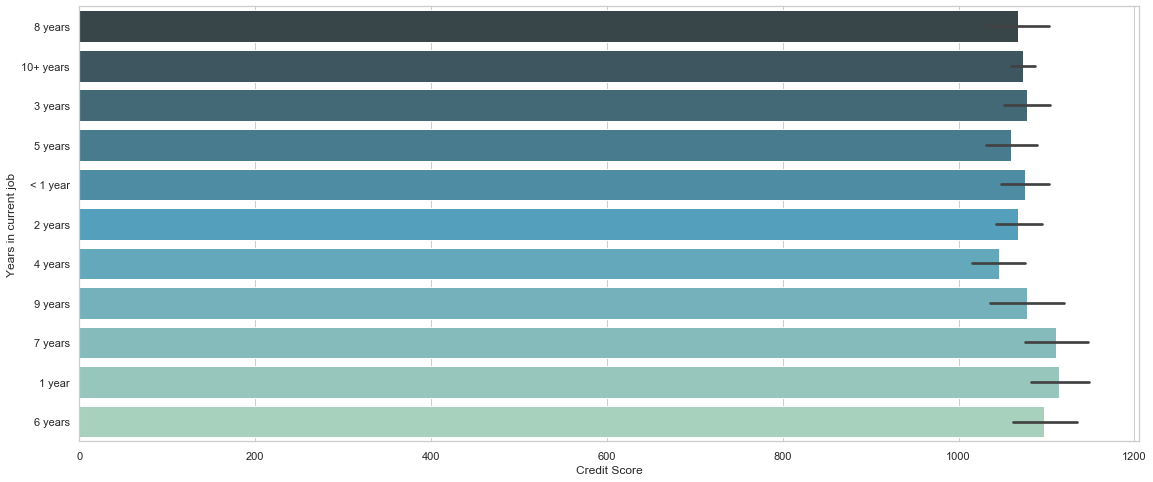

In [65]:
plt.figure(figsize=(19,8))
sns.barplot(data=df, x='Credit Score', y='Years in current job', palette='GnBu_d')
plt.show()

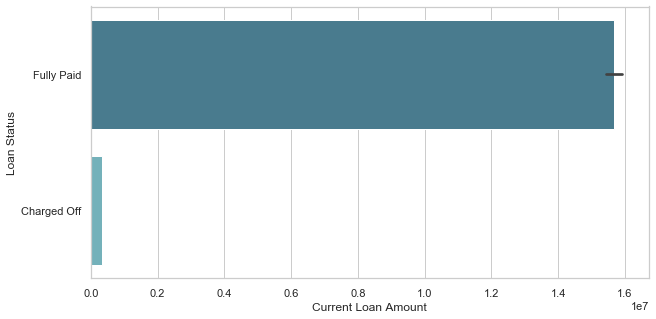

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Current Loan Amount', y='Loan Status', palette='GnBu_d')
plt.show()

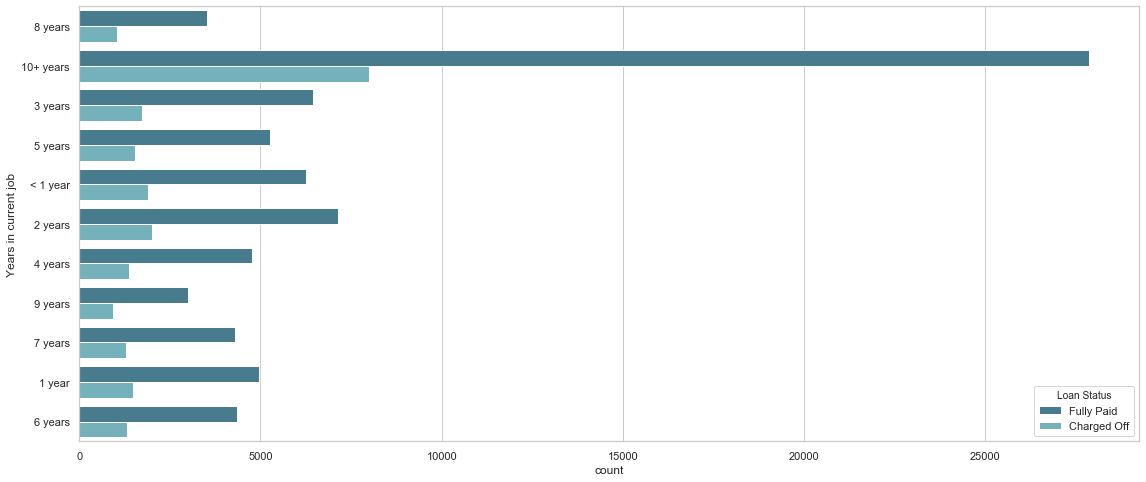

In [67]:
plt.figure(figsize=(19,8))
sns.countplot(data=df,y='Years in current job', hue="Loan Status", palette='GnBu_d')
plt.show()

- Years current job more longer, loan status history also increased, fully paid and charged off have significant number between another years

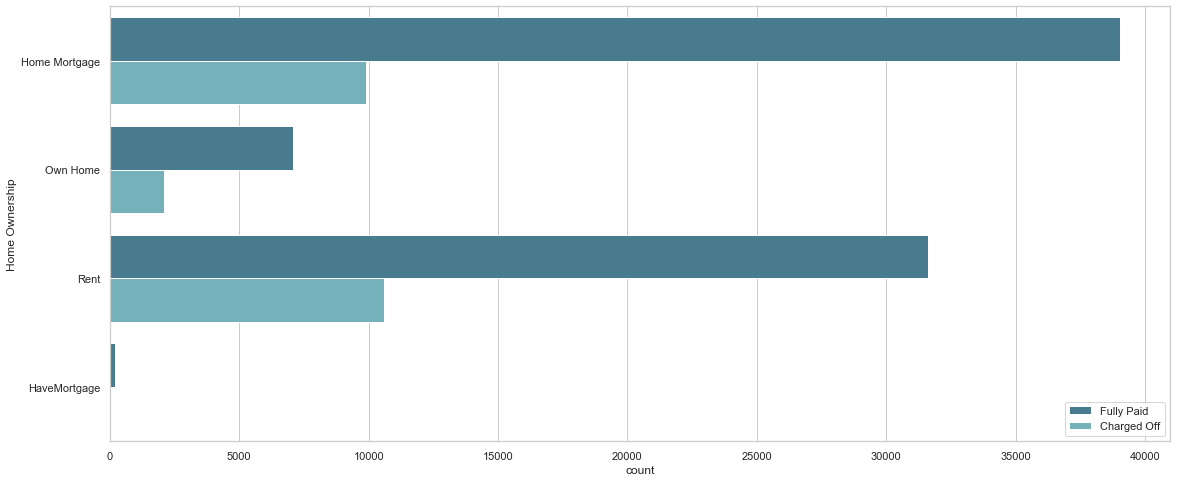

In [68]:
plt.figure(figsize=(19,8))
sns.countplot(data=df,y='Home Ownership', hue="Loan Status", palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

- People living in rent home and home mortagage have same amount charged off
- Have mortage minimal score for charged off

- Home mortgage adalah pinjaman yang diberikan oleh bank, perusahaan hipotek, atau lembaga keuangan lainnya untuk pembelian tempat tinggal — baik tempat tinggal primer, tempat tinggal sekunder, atau tempat tinggal investasi - berbeda dengan sepotong properti komersial atau industri. Dalam hipotek rumah, pemilik properti (peminjam) mentransfer hak kepada pemberi pinjaman dengan syarat bahwa hak tersebut akan ditransfer kembali ke pemilik begitu pembayaran pinjaman terakhir telah dilakukan dan persyaratan hipotek lainnya telah dipenuhi .


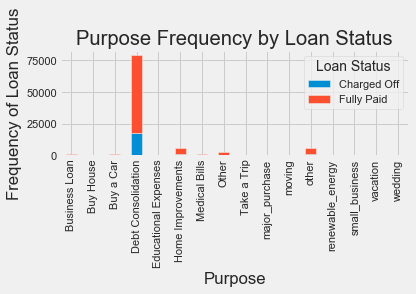

In [257]:
pd.crosstab(df['Purpose'],df['Loan Status']).plot(kind='bar',stacked=True)
plt.title('Purpose Frequency by Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Frequency of Loan Status')
plt.tight_layout()

In [256]:
purp_loan= ['Purpose', 'Loan Status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[purp_loan[0]], df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Loan Status,Charged Off,Fully Paid
Purpose,,
Business Loan,2.11,1.4
Buy House,0.62,0.69
Buy a Car,0.9,1.36
Debt Consolidation,79.15,78.52
Educational Expenses,0.08,0.1
Home Improvements,5.14,6
Medical Bills,1.23,1.09
Other,2.65,3.4
Take a Trip,0.51,0.59


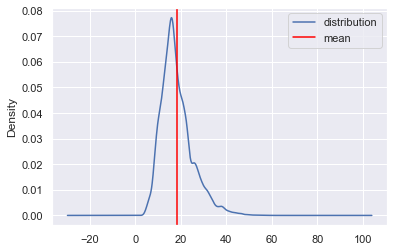

In [71]:
sns.set_style('darkgrid')
df['Years of Credit History'].plot.kde(label='distribution')
plt.axvline(df['Years of Credit History'].mean(),color='red',label='mean')
plt.legend(loc='best')
plt.show()

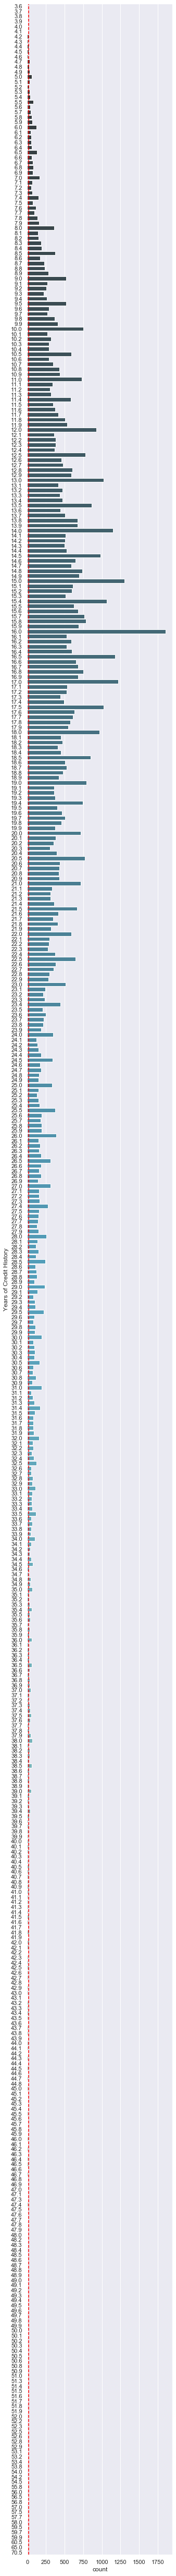

In [72]:
plt.figure(figsize=(5,90))
sns.countplot(data=df, y='Years of Credit History', palette='GnBu_d')
plt.axvline(df['Years of Credit History'].mean(),color='red',label='mean',linestyle='dashed')
plt.show()

In [73]:
df['Years of Credit History'].mean()

18.187895218575914

- mean from years of credit history in 18, but there is fun part maximal credit history 70, i assume this is outlier

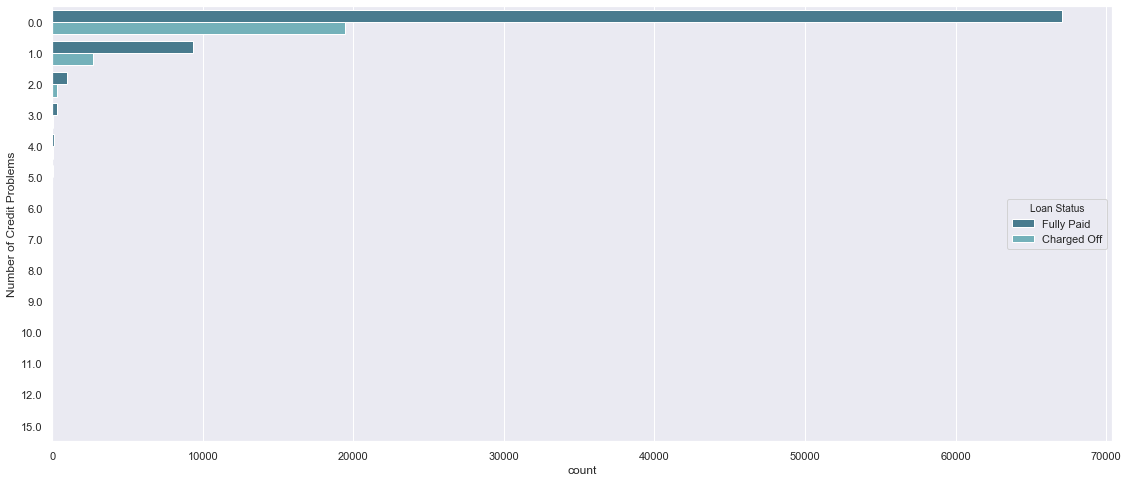

In [74]:
plt.figure(figsize=(19,8))
sns.countplot(data=df,y='Number of Credit Problems', hue="Loan Status", palette='GnBu_d')
plt.show()

- more high number more risk

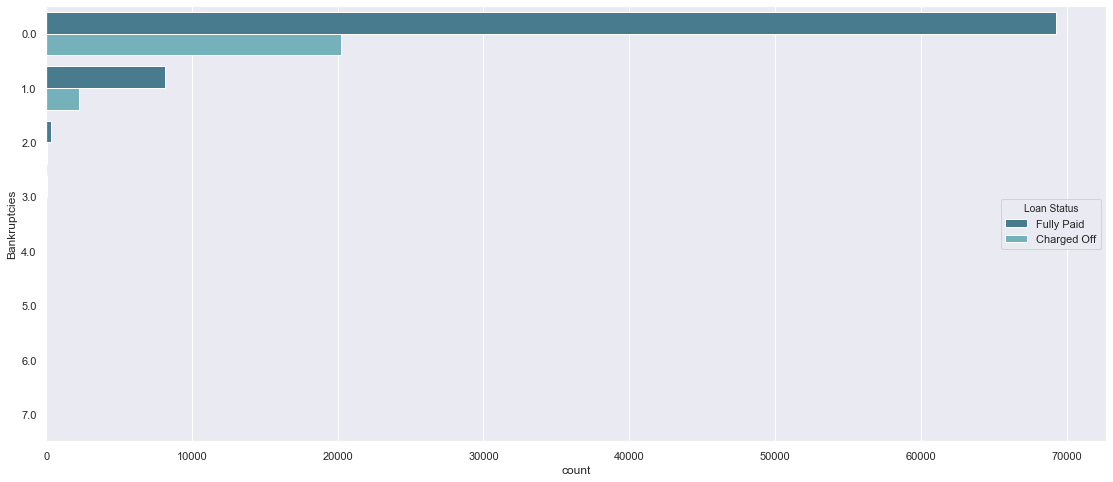

In [75]:
plt.figure(figsize=(19,8))
sns.countplot(data=df,y='Bankruptcies', hue="Loan Status", palette='GnBu_d')
plt.show()

- so our loans is stil have good customer by looking at from Bankruptcies

>### Bad Debt or Charged Off Insight

In [76]:
df['Current Loan Amount'].min()

10802.0

In [77]:
df[df['Current Loan Amount'] == 10802.0]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
87741,Fully Paid,10802.0,Short Term,1076.456089,1.378277e+06,< 1 year,HaveMortgage,Take a Trip,373.73,27.4,3.0,0.0,817.0,25696.0,0.0,0.0


In [78]:
bad_debt = df[df['Loan Status'] == 'Charged Off' ]

In [79]:
bad_debt

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
7,Charged Off,648714.0,Long Term,1076.456089,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
16,Charged Off,653004.0,Long Term,1076.456089,1.378277e+06,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0
20,Charged Off,317108.0,Long Term,687.000000,1.133274e+06,8 years,Rent,Debt Consolidation,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0
22,Charged Off,153252.0,Short Term,714.000000,1.890690e+06,2 years,Rent,Debt Consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,Charged Off,380204.0,Short Term,728.000000,1.046805e+06,10+ years,Own Home,Debt Consolidation,32625.28,16.9,8.0,0.0,268964.0,415800.0,0.0,0.0
99975,Charged Off,274076.0,Short Term,736.000000,7.096500e+05,10+ years,Rent,Debt Consolidation,4204.70,35.3,13.0,0.0,102866.0,844712.0,0.0,0.0
99981,Charged Off,666666.0,Short Term,725.000000,3.838380e+06,7 years,Home Mortgage,Debt Consolidation,48939.44,12.4,18.0,0.0,507414.0,1004322.0,0.0,0.0
99988,Charged Off,309474.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0


In [80]:
bad_debt['Term'].value_counts(normalize=True)

Short Term    0.630461
Long Term     0.369539
Name: Term, dtype: float64

In [81]:
bad_debt[bad_debt['Term'] == 'Short Term']

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
22,Charged Off,153252.0,Short Term,714.000000,1.890690e+06,2 years,Rent,Debt Consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0
32,Charged Off,130174.0,Short Term,733.000000,5.246090e+05,< 1 year,Rent,Debt Consolidation,9311.71,15.4,7.0,1.0,130701.0,268818.0,1.0,0.0
38,Charged Off,259842.0,Short Term,1076.456089,1.378277e+06,8 years,Home Mortgage,Debt Consolidation,11792.73,20.6,9.0,0.0,401584.0,708818.0,0.0,0.0
43,Charged Off,288948.0,Short Term,7120.000000,5.374720e+05,10+ years,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,Charged Off,380204.0,Short Term,728.000000,1.046805e+06,10+ years,Own Home,Debt Consolidation,32625.28,16.9,8.0,0.0,268964.0,415800.0,0.0,0.0
99975,Charged Off,274076.0,Short Term,736.000000,7.096500e+05,10+ years,Rent,Debt Consolidation,4204.70,35.3,13.0,0.0,102866.0,844712.0,0.0,0.0
99981,Charged Off,666666.0,Short Term,725.000000,3.838380e+06,7 years,Home Mortgage,Debt Consolidation,48939.44,12.4,18.0,0.0,507414.0,1004322.0,0.0,0.0
99988,Charged Off,309474.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0


In [82]:
bad_debt[bad_debt['Term'] == 'Short Term'].describe(include='O')

,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,14273,14273,14273,14273,14273
unique,1,1,11,4,16
top,Charged Off,Short Term,10+ years,Rent,Debt Consolidation
freq,14273,14273,4873,7342,11052


In [83]:
bad_debt[bad_debt['Term'] == 'Short Term'].describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,14273.000000,14273.000000,1.427300e+04,14273.000000,14273.000000,14273.000000,14273.000000,1.427300e+04,1.427300e+04,14273.000000,14273.000000
mean,260828.571989,2100.825762,1.231527e+06,17002.551445,17.570441,10.917256,0.181462,2.579843e+05,5.904222e+05,0.121278,0.034681
std,164126.885901,2557.399753,1.534859e+06,11389.787280,7.192826,4.986903,0.513551,3.844200e+05,2.408367e+06,0.356029,0.291393
min,21450.000000,589.000000,7.662700e+04,0.000000,4.100000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,140558.000000,725.000000,7.897730e+05,9300.310000,12.700000,7.000000,0.000000,1.056970e+05,2.383260e+05,0.000000,0.000000
50%,219296.000000,744.000000,1.225139e+06,14753.690000,16.300000,10.000000,0.000000,1.874160e+05,3.964840e+05,0.000000,0.000000
75%,333960.000000,1076.456089,1.378277e+06,21992.690000,21.000000,13.000000,0.000000,3.210050e+05,6.554900e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,205801.350000,60.500000,76.000000,12.000000,3.287897e+07,1.750436e+08,5.000000,9.000000


- Short term 63% have more bad debt than long term 36%
- In short term years current job : 10+years, home ownership: rent, and purpose : debt consolidation creditor must give more atention to lender 

In [84]:
df['Loan Status'].value_counts()

Fully Paid     77875
Charged Off    22639
Name: Loan Status, dtype: int64

- from 100514 data we have 22639 or 22% data as "Bad Debt"

In [85]:
bad_debt['Annual Income'].mean()

1294285.1452971525

In [86]:
bad_debt['Years in current job'].value_counts()

10+ years    7996
2 years      2002
< 1 year     1908
3 years      1730
5 years      1532
1 year       1493
4 years      1376
6 years      1320
7 years      1289
8 years      1051
9 years       942
Name: Years in current job, dtype: int64

- the longer the work, does not become a benchmark creditors will also pay well

In [87]:
bad_debt['Years of Credit History'].max()

60.5

In [88]:
bad_debt['Credit Score'].mean()

2084.350417823604

In [89]:
bad_debt.min()

Loan Status                    Charged Off
Current Loan Amount                  21450
Term                             Long Term
Credit Score                           585
Annual Income                        76627
Years in current job                1 year
Home Ownership                HaveMortgage
Purpose                      Business Loan
Monthly Debt                             0
Years of Credit History                4.1
Number of Open Accounts                  0
Number of Credit Problems                0
Current Credit Balance                   0
Maximum Open Credit                      0
Bankruptcies                             0
Tax Liens                                0
dtype: object

In [90]:
df[df['Current Loan Amount'] == 21450]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
79041,Fully Paid,21450.0,Short Term,713.0,463182.0,6 years,Rent,Medical Bills,13161.87,7.1,10.0,0.0,83657.0,160886.0,0.0,0.0
81961,Fully Paid,21450.0,Short Term,713.0,463182.0,6 years,Rent,Medical Bills,13161.87,7.1,10.0,0.0,83657.0,160886.0,0.0,0.0
98523,Charged Off,21450.0,Short Term,694.0,1132381.0,10+ years,HaveMortgage,Take a Trip,21987.18,27.2,12.0,0.0,339511.0,568898.0,0.0,0.0


- as we can see minimal current loan amount is 21450 as bad debt, but this problem is not make the creditor is not good.

In [91]:
bad_debt.max()

Loan Status                  Charged Off
Current Loan Amount               789250
Term                          Short Term
Credit Score                        7510
Annual Income                1.65557e+08
Years in current job            < 1 year
Home Ownership                      Rent
Purpose                          wedding
Monthly Debt                      435843
Years of Credit History             60.5
Number of Open Accounts               76
Number of Credit Problems             12
Current Credit Balance        3.2879e+07
Maximum Open Credit          1.75044e+08
Bankruptcies                           5
Tax Liens                              9
dtype: object

In [92]:
bad_debt['Purpose'].value_counts()

Debt Consolidation      17918
other                    1426
Home Improvements        1163
Other                     600
Business Loan             478
Medical Bills             278
Buy a Car                 203
Buy House                 140
small_business            119
Take a Trip               115
major_purchase             82
moving                     43
vacation                   29
wedding                    23
Educational Expenses       18
renewable_energy            4
Name: Purpose, dtype: int64

- the most is debt consolidation
    - Debt consolidation is the act of taking out a new loan to pay off other liabilities and consumer debts, generally unsecured ones.
    - Debt consolidation loans don’t erase the original debt but transfer a consumer's loans to a different lender or type of loan.

In [93]:
bad_debt[bad_debt['Current Loan Amount'] == 789250]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
82002,Charged Off,789250.0,Short Term,1076.456089,1.378277e+06,2 years,Home Mortgage,Debt Consolidation,17267.96,21.0,8.0,0.0,402838.0,767184.0,0.0,0.0


In [94]:
bad_debt[bad_debt['Tax Liens'] == 9]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
39439,Charged Off,158994.0,Short Term,718.0,1334921.0,10+ years,Home Mortgage,Debt Consolidation,26364.78,16.4,6.0,9.0,88635.0,178816.0,0.0,9.0


- this is bad for creditor goverment can collect before creditor do

In [95]:
bad_debt[bad_debt['Bankruptcies'] == 5]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
948,Charged Off,298760.0,Short Term,1076.456089,1.378277e+06,10+ years,Rent,Debt Consolidation,11952.14,17.3,9.0,6.0,191786.0,329494.0,5.0,0.0
49159,Charged Off,214654.0,Long Term,6700.000000,5.376050e+05,2 years,Home Mortgage,Home Improvements,15321.98,16.6,8.0,5.0,195586.0,381898.0,5.0,0.0


- worst of the worst
credit score doesnt mean lender is good

> ### Statistic test in column Years of Credit History & Years in current job

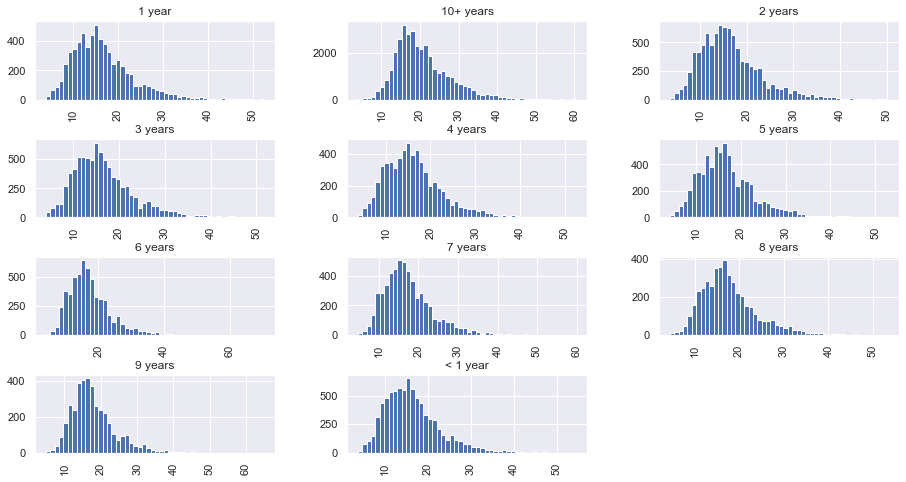

In [96]:
df.hist(column='Years of Credit History', by='Years in current job', bins=50,figsize=(15,8))
plt.show()

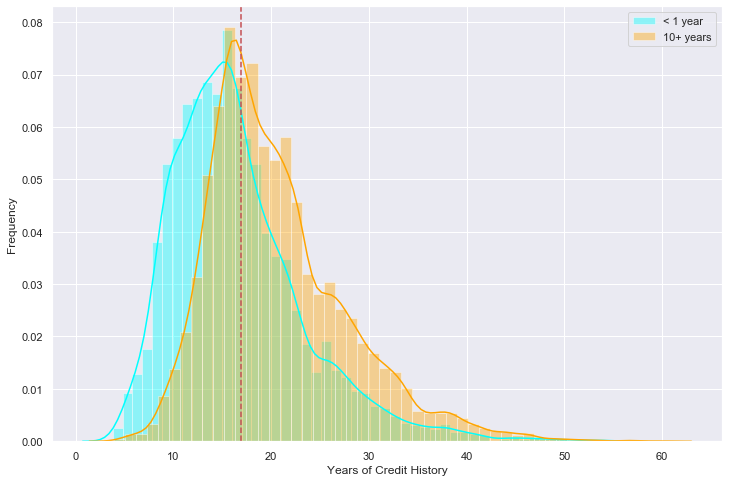

In [97]:
median= df['Years of Credit History'].median()
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df[df['Years in current job'] == '< 1 year']['Years of Credit History'],color='cyan', 
             label = '< 1 year')
sns.distplot(df[df['Years in current job'] == '10+ years']['Years of Credit History'],color='orange',
            label = '10+ years')
plt.legend()
plt.axvline(median, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.show()

In [98]:
from scipy.stats import anderson

def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [99]:
try_normal(df[df['Years in current job'] == '10+ years']['Years of Credit History'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 586.314828247967}}

- I assume, I used the stat level 586, and conclude not accept H0, data is not normal distribution

In [100]:
try_normal(df[df['Years in current job'] == '< 1 year']['Years of Credit History'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 130.06790335302867}}

- I assume, I used the stat level 130, and conclude not accept H0, data is not normal distribution

In [102]:
df_years = df[df['Years in current job'] == '< 1 year']
df_years10 = df[df['Years in current job'] == '10+ years']

In [103]:
from scipy.stats import mannwhitneyu
result = mannwhitneyu(df_years['Years of Credit History'],
                      df_years10['Years of Credit History'])
print('U-statistic : ' , result[0])
print('P-Value : ' , result[1])

U-statistic :  93698758.5
P-Value :  0.0


In [104]:
from pingouin import pairwise_ttests

In [105]:
pairwise_ttests(data=df,dv='Years of Credit History',between='Years in current job', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Years in current job,8 years,10+ years,False,False,62359857.0,two-sided,7.821340e-156,-0.389
1,Years in current job,8 years,3 years,False,False,21354477.0,two-sided,5.592839e-40,0.210
2,Years in current job,8 years,5 years,False,False,17000506.5,two-sided,2.765970e-17,0.150
3,Years in current job,8 years,< 1 year,False,False,21343365.5,two-sided,5.003440e-40,0.198
4,Years in current job,8 years,2 years,False,False,23838503.0,two-sided,1.864273e-40,0.203
5,Years in current job,8 years,4 years,False,False,16227000.5,two-sided,5.525754e-42,0.239
6,Years in current job,8 years,9 years,False,False,8880988.5,two-sided,1.130798e-01,-0.027
7,Years in current job,8 years,7 years,False,False,13276048.5,two-sided,6.900266e-04,0.057
8,Years in current job,8 years,1 year,False,False,16840039.0,two-sided,4.207882e-35,0.202
9,Years in current job,8 years,6 years,False,False,13853512.5,two-sided,3.059865e-08,0.100


- Conclusion : after look from this test , we have unpaired data

>### Distribution on dataset loan status and credit score

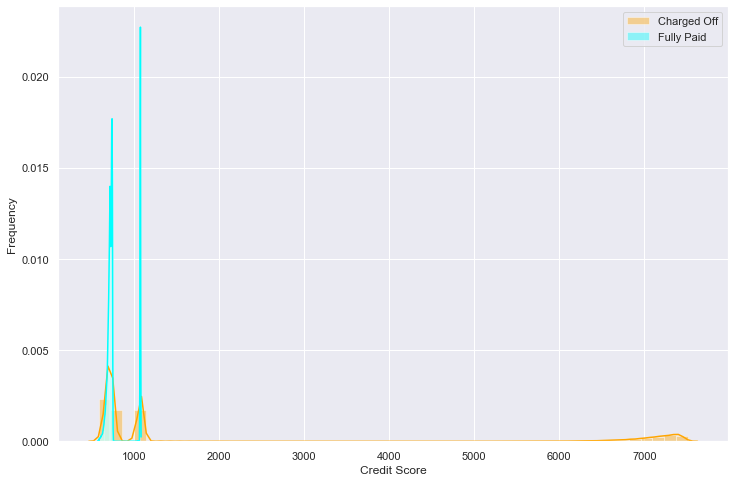

In [106]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df[df['Loan Status'] == 'Charged Off']['Credit Score'],color='orange', 
             label = 'Charged Off')
sns.distplot(df[df['Loan Status'] == 'Fully Paid']['Credit Score'],color='cyan',
            label = 'Fully Paid')
plt.legend()
plt.ylabel('Frequency')
plt.show()

In [107]:
ls_diff = df[(df[df['Loan Status'] == 'Charged Off'] < lower_limit ) | (df[df['Loan Status'] == 'Charged Off'] > upper_limit)]['Loan Status']

In [108]:
try_normal(df[df['Loan Status'] == 'Charged Off']['Credit Score'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 5116.222247617665}}

In [109]:
try_normal(df[df['Loan Status'] == 'Fully Paid']['Credit Score'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 13745.476719843617}}

- Still not normal distribution not accept H0

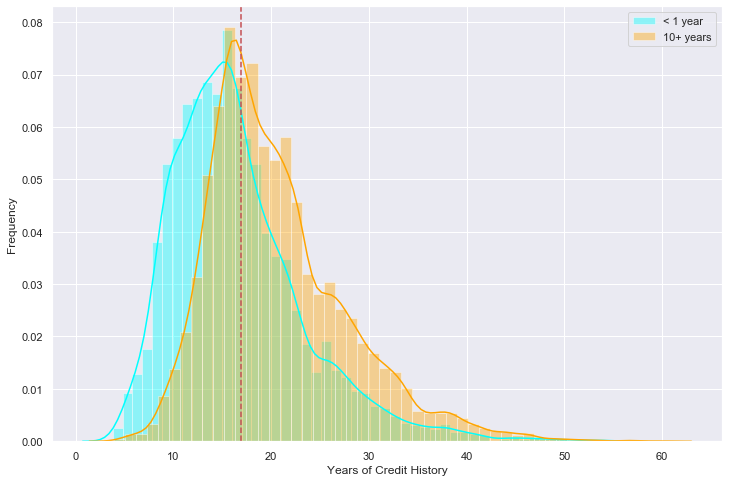

In [110]:
median= df['Years of Credit History'].median()
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df[df['Years in current job'] == '< 1 year']['Years of Credit History'],color='cyan', 
             label = '< 1 year')
sns.distplot(df[df['Years in current job'] == '10+ years']['Years of Credit History'],color='orange',
            label = '10+ years')
plt.legend()
plt.axvline(median, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.show()

- looks like we have normal distribution

In [111]:
try_normal(df[df['Years in current job'] == '10+ years']['Years of Credit History'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 586.314828247967}}

In [112]:
try_normal(df[df['Years in current job'] == '< 1 year']['Years of Credit History'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 130.06790335302867}}

- I assume, I used the stat level and conclude not accept H0, data is not normal distribution, but the score is better than before after remove outlier

In [113]:
from scipy.stats import mannwhitneyu
result = mannwhitneyu(df_years['Years of Credit History'],
                      df_years10['Years of Credit History'])
print('U-statistic : ' , result[0])
print('P-Value : ' , result[1])

U-statistic :  93698758.5
P-Value :  0.0


- Customers with poor credit history in past are more likely to charged off in future
- Customers with high (loan_value / income) are likely to charged off more than those with low ratio
- Customers doing impulsive are more likely to be at a higher credit risk

>## Feature Engineering

In [115]:
df.head(1)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0


#### Change categorical column to numerical

In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
df['Loan Status'].value_counts()

Fully Paid     77875
Charged Off    22639
Name: Loan Status, dtype: int64

In [118]:
# X (features)
X = pd.get_dummies(df.drop(['Loan Status','Years in current job','Number of Open Accounts'],axis=1), drop_first=True)
# y (target)
y = df['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [119]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,1.0,228190.0,416746.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,0.0,229976.0,850784.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,1.0,297996.0,750090.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,0.0,256329.0,386958.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,0.0,253460.0,427174.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,99999999.0,1076.456089,1.378277e+06,0.00,16.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100510,99999999.0,1076.456089,1.378277e+06,0.00,16.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100511,99999999.0,1076.456089,1.378277e+06,0.00,16.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100512,99999999.0,1076.456089,1.378277e+06,0.00,16.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 29 columns):
Current Loan Amount             100514 non-null float64
Credit Score                    100514 non-null float64
Annual Income                   100514 non-null float64
Monthly Debt                    100514 non-null float64
Years of Credit History         100514 non-null float64
Number of Credit Problems       100514 non-null float64
Current Credit Balance          100514 non-null float64
Maximum Open Credit             100514 non-null float64
Bankruptcies                    100514 non-null float64
Tax Liens                       100514 non-null float64
Term_Short Term                 100514 non-null uint8
Home Ownership_Home Mortgage    100514 non-null uint8
Home Ownership_Own Home         100514 non-null uint8
Home Ownership_Rent             100514 non-null uint8
Purpose_Buy House               100514 non-null uint8
Purpose_Buy a Car               100514 non-null uint8
Purpo

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

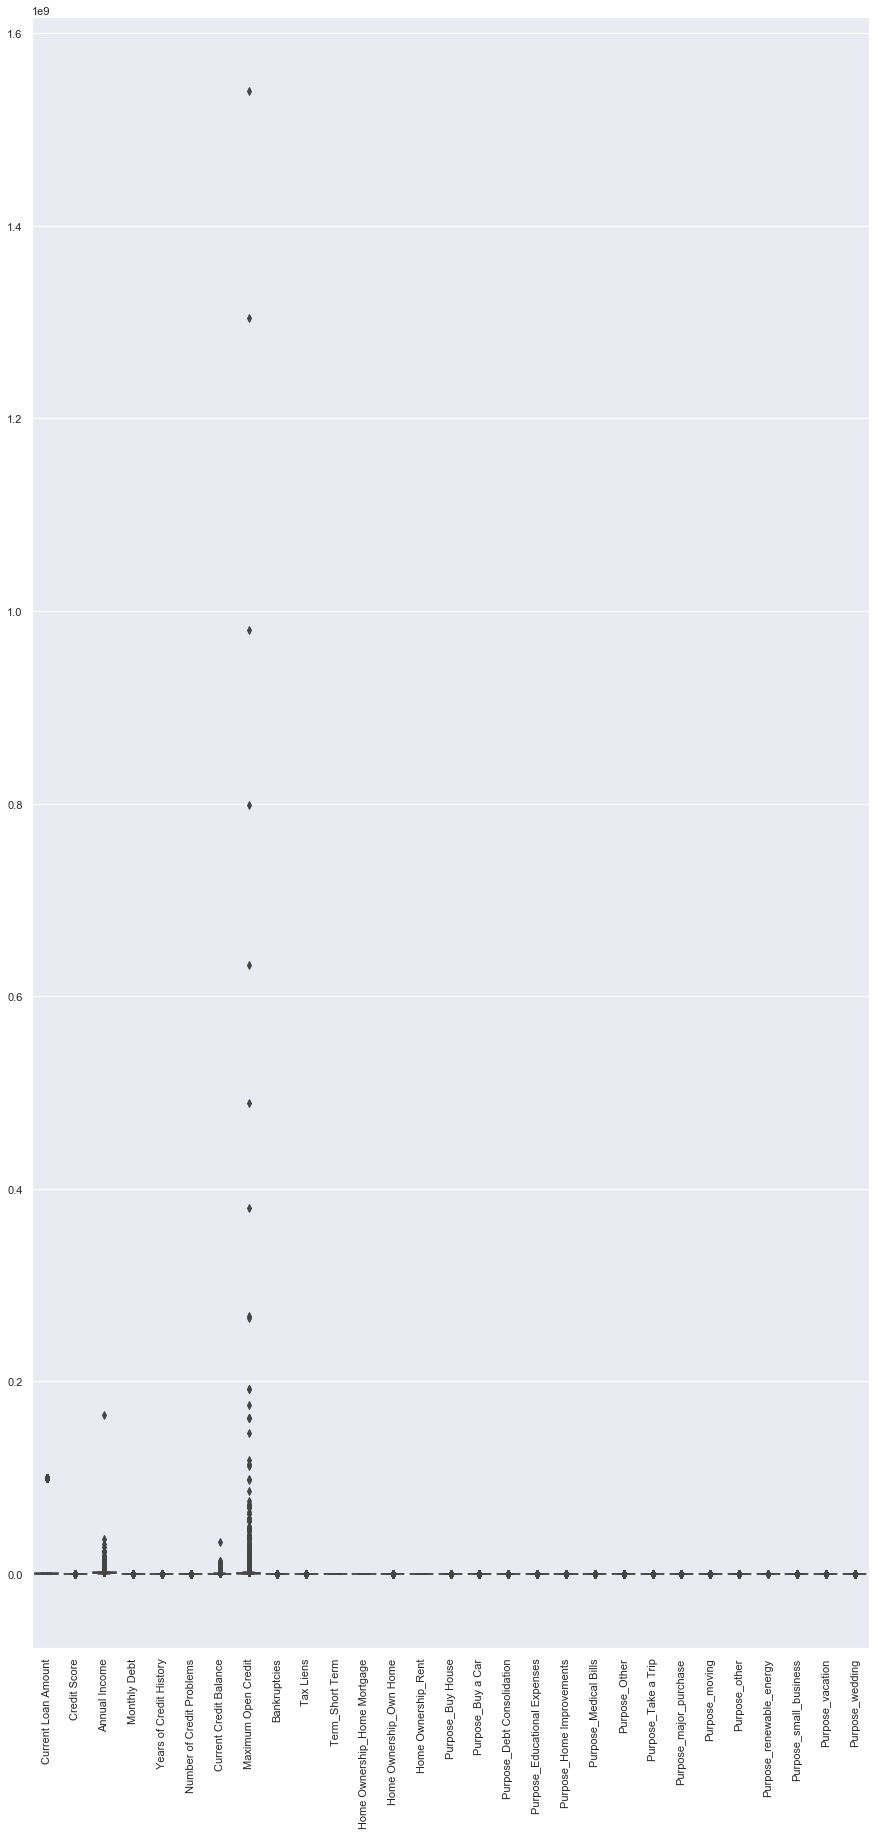

In [121]:
plt.figure(figsize=(15,30))
sns.boxplot(data=X)
plt.xticks(rotation=90)

- Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
x_scaler = X.copy()

In [124]:
standard_scaler = StandardScaler()
x_scaler = pd.DataFrame(standard_scaler.fit_transform(x_scaler), columns=x_scaler.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

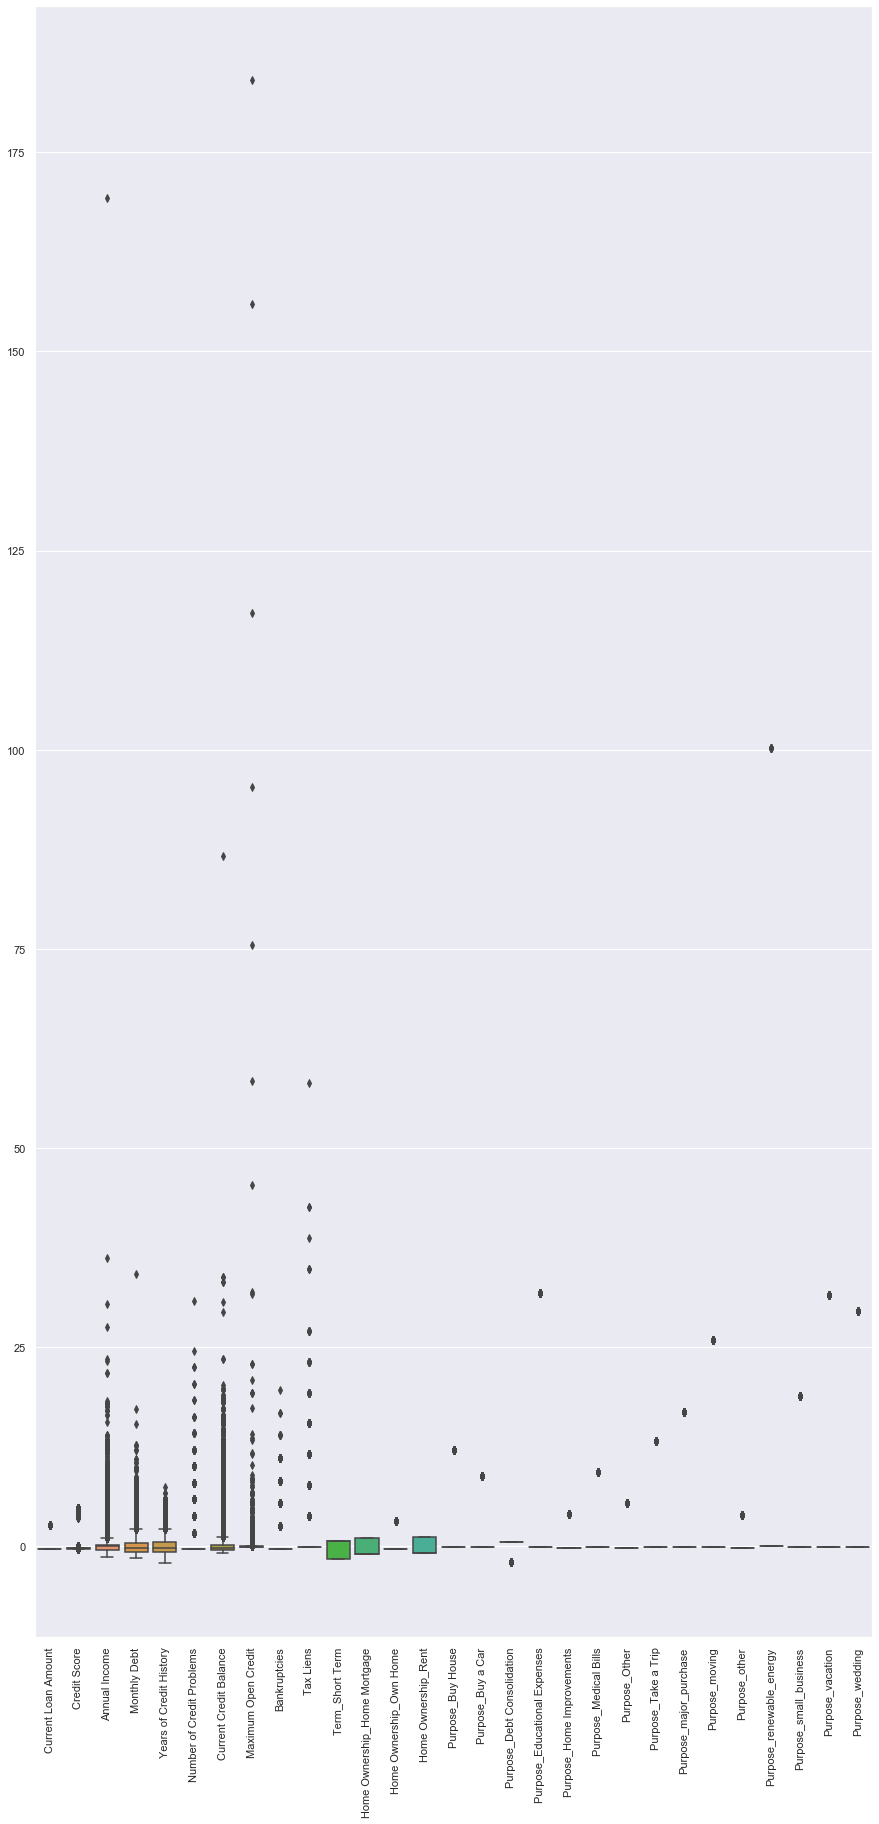

In [125]:
plt.figure(figsize=(15,30))
sns.boxplot(data=x_scaler)
plt.xticks(rotation=90)

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [126]:
from sklearn.decomposition import PCA
PCA = PCA(random_state=101, n_components=2)
xpca = PCA.fit_transform(x_scaler)

In [127]:
DFx_pca = pd.DataFrame(xpca, columns=['PC 1', 'PC 2'])
DFx_pca

,PC 1,PC 2
0,-0.119059,3.703749
1,1.448121,-0.245730
2,0.235055,0.776245
3,-0.506132,-0.617252
4,-1.316502,-1.184532
...,...,...
100509,-0.113592,-0.184888
100510,-0.113592,-0.184888
100511,-0.113592,-0.184888
100512,-0.113592,-0.184888


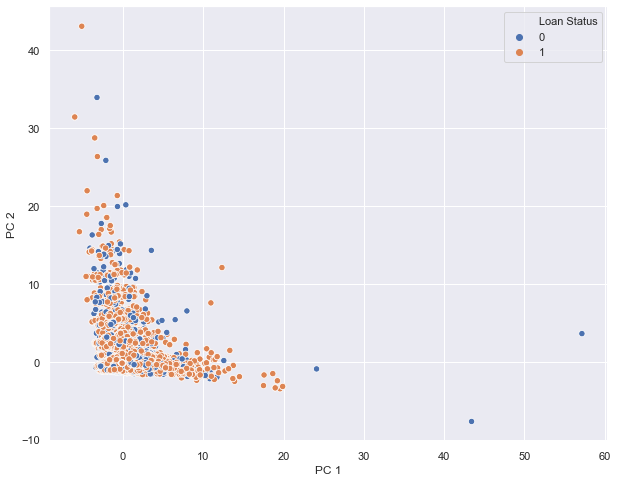

In [128]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=DFx_pca, x='PC 1', y='PC 2', hue=y, s= 40)
plt.show()

- Clustering is a type of unsupervised machine learning which aims to find homogeneous subgroups such that objects in the same group (clusters) are more similar to each other than the others.
- The clusters can be used as features in a supervised machine learning model.

In [129]:
DFx_pca['Loan Status'] = df['Loan Status']

In [130]:
DFx_pca

,PC 1,PC 2,Loan Status
0,-0.119059,3.703749,Fully Paid
1,1.448121,-0.245730,Fully Paid
2,0.235055,0.776245,Fully Paid
3,-0.506132,-0.617252,Fully Paid
4,-1.316502,-1.184532,Fully Paid
...,...,...,...
100509,-0.113592,-0.184888,Fully Paid
100510,-0.113592,-0.184888,Fully Paid
100511,-0.113592,-0.184888,Fully Paid
100512,-0.113592,-0.184888,Fully Paid


In [131]:
Xpca = DFx_pca.drop('Loan Status', axis=1)
ypca = DFx_pca['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, ypca, test_size=0.2, random_state=101)

In [133]:
from sklearn.ensemble import RandomForestClassifier
rpca = RandomForestClassifier(random_state=101)
rpca.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rpca.predict(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.13      0.19      4522
           1       0.79      0.93      0.85     15581

    accuracy                           0.75     20103
   macro avg       0.56      0.53      0.52     20103
weighted avg       0.69      0.75      0.70     20103



Not have good result, i will try different method

>### Supervised Modelling

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [149]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
oversampledX_train, oversampledy_train = sm.fit_sample(X_train, y_train)

In [150]:
oversampledX_train = pd.DataFrame(oversampledX_train, columns=X_train.columns)

In [151]:
# Original data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80411 entries, 55086 to 45919
Data columns (total 29 columns):
Current Loan Amount             80411 non-null float64
Credit Score                    80411 non-null float64
Annual Income                   80411 non-null float64
Monthly Debt                    80411 non-null float64
Years of Credit History         80411 non-null float64
Number of Credit Problems       80411 non-null float64
Current Credit Balance          80411 non-null float64
Maximum Open Credit             80411 non-null float64
Bankruptcies                    80411 non-null float64
Tax Liens                       80411 non-null float64
Term_Short Term                 80411 non-null uint8
Home Ownership_Home Mortgage    80411 non-null uint8
Home Ownership_Own Home         80411 non-null uint8
Home Ownership_Rent             80411 non-null uint8
Purpose_Buy House               80411 non-null uint8
Purpose_Buy a Car               80411 non-null uint8
Purpose_Debt Consol

In [152]:
# Oversampled data
oversampledX_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124588 entries, 0 to 124587
Data columns (total 29 columns):
Current Loan Amount             124588 non-null float64
Credit Score                    124588 non-null float64
Annual Income                   124588 non-null float64
Monthly Debt                    124588 non-null float64
Years of Credit History         124588 non-null float64
Number of Credit Problems       124588 non-null float64
Current Credit Balance          124588 non-null float64
Maximum Open Credit             124588 non-null float64
Bankruptcies                    124588 non-null float64
Tax Liens                       124588 non-null float64
Term_Short Term                 124588 non-null uint8
Home Ownership_Home Mortgage    124588 non-null uint8
Home Ownership_Own Home         124588 non-null uint8
Home Ownership_Rent             124588 non-null uint8
Purpose_Buy House               124588 non-null uint8
Purpose_Buy a Car               124588 non-null uint8
Purpo

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.model_selection import GridSearchCV

>### Logistic Regression Original Data

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log = LogisticRegression(random_state=101)
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
predictlog = log.predict(X_test)

In [157]:
print(classification_report(y_test, predictlog))

              precision    recall  f1-score   support

           0       0.92      0.21      0.34      4522
           1       0.81      0.99      0.89     15581

    accuracy                           0.82     20103
   macro avg       0.87      0.60      0.62     20103
weighted avg       0.84      0.82      0.77     20103



In [158]:
print(confusion_matrix(y_test,predictlog))

[[  948  3574]
 [   83 15498]]


In [159]:
matthews_corrcoef(y_test,predictlog)

0.3867543552359788

#### Tuning

In [160]:
searchlog = GridSearchCV(estimator = log,
                      param_grid = {
                          'penalty': ['l1', 'l2'],
                          'C': [0.0001,0.001, 0.01, 0.1, 1],
                          'max_iter' : [100,200,500]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchlog.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [161]:
print(searchlog.best_params_)
print('\n')
print(searchlog.best_score_)

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}


0.8154107953685692


In [162]:
print(classification_report(y_test, searchlog.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.21      0.34      4522
           1       0.81      0.99      0.89     15581

    accuracy                           0.82     20103
   macro avg       0.87      0.60      0.62     20103
weighted avg       0.84      0.82      0.77     20103



### AUROC Measuring Performance

In [163]:
predict_proba = log.predict_proba(X_test)
predict_proba

array([[4.75009709e-01, 5.24990291e-01],
       [1.43522756e-01, 8.56477244e-01],
       [3.95596273e-01, 6.04403727e-01],
       ...,
       [9.41035116e-06, 9.99990590e-01],
       [3.06590484e-01, 6.93409516e-01],
       [9.97392643e-02, 9.00260736e-01]])

In [164]:
Prediction_AUC = predict_proba[:,1]
FPR, TPR, thresholds = roc_curve(y_test, Prediction_AUC)
roc_auc = auc(FPR,TPR)

Text(0.5, 0, 'FPR')

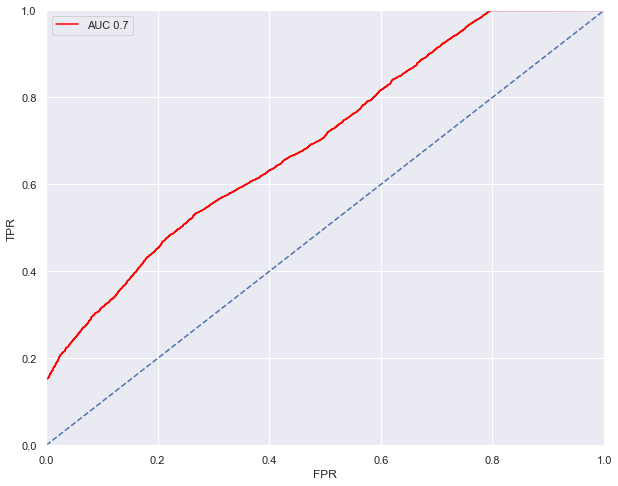

In [165]:
plt.figure(figsize=(10,8))
plt.plot(FPR,TPR, label =f'AUC {round(roc_auc,2)}', color='red')
plt.plot([0,1],[0,1], linestyle='dashed')
plt.legend(loc='upper left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')

- AUROC of 0.70 is good performance
- AUC is 0.7, it means there is 70% chance that model will be able to distinguish between positive class and negative class

>### Logistic Regression with Oversampled data

In [166]:
log.fit(oversampledX_train,oversampledy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.75      0.44      4522
           1       0.88      0.52      0.65     15581

    accuracy                           0.57     20103
   macro avg       0.59      0.63      0.54     20103
weighted avg       0.75      0.57      0.60     20103



In [168]:
searchlogover = GridSearchCV(estimator = log,
                      param_grid = {
                          'penalty': ['l1', 'l2'],
                          'C': [0.001, 0.01, 0.1, 1],
                          'max_iter' : [100,200,500]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchlogover.fit(oversampledX_train, oversampledy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [169]:
print(searchlogover.best_params_)
print('\n')
print(searchlogover.best_score_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


0.6541723453239665


In [170]:
print(classification_report(y_test, searchlogover.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.75      0.44      4522
           1       0.88      0.52      0.65     15581

    accuracy                           0.57     20103
   macro avg       0.59      0.63      0.54     20103
weighted avg       0.75      0.57      0.60     20103



>### Random Forest Original Data

In [171]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [172]:
predictionrfc = rfc.predict(X_test)

In [173]:
print(classification_report(y_test,predictionrfc))

              precision    recall  f1-score   support

           0       0.84      0.26      0.39      4522
           1       0.82      0.99      0.90     15581

    accuracy                           0.82     20103
   macro avg       0.83      0.62      0.64     20103
weighted avg       0.83      0.82      0.78     20103



In [174]:
searchrfc = GridSearchCV(estimator = rfc,
                      param_grid = {
                          'n_estimators': [10, 20, 30],
                          'bootstrap': [True, False],
                          'min_samples_split': [2, 4, 6, 8]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchrfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [175]:
print(searchrfc.best_params_)
print('\n')
print(searchrfc.best_score_)

{'bootstrap': True, 'min_samples_split': 8, 'n_estimators': 30}


0.8171021102808437


In [176]:
print(classification_report(y_test, searchrfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.25      0.39      4522
           1       0.82      0.99      0.89     15581

    accuracy                           0.82     20103
   macro avg       0.82      0.62      0.64     20103
weighted avg       0.82      0.82      0.78     20103



>### RandomForest with Oversampled data

In [177]:
rfc = RandomForestClassifier(random_state=101)
rfc.fit(oversampledX_train,oversampledy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [178]:
predictoverrfc = rfc.predict(X_test)

In [179]:
print(classification_report(y_test,predictionrfc))

              precision    recall  f1-score   support

           0       0.84      0.26      0.39      4522
           1       0.82      0.99      0.90     15581

    accuracy                           0.82     20103
   macro avg       0.83      0.62      0.64     20103
weighted avg       0.83      0.82      0.78     20103



In [180]:
searchrfcover = GridSearchCV(estimator = rfc,
                      param_grid = {
                          'n_estimators': [10, 20, 30],
                          'bootstrap': [True, False],
                          'min_samples_split': [2, 4, 6, 8]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchrfcover.fit(oversampledX_train, oversampledy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [181]:
print(searchrfcover.best_params_)
print('\n')
print(searchrfcover.best_score_)

{'bootstrap': False, 'min_samples_split': 2, 'n_estimators': 30}


0.8636477748552356


In [182]:
print(classification_report(y_test, searchrfcover.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45      4522
           1       0.83      0.93      0.88     15581

    accuracy                           0.80     20103
   macro avg       0.72      0.65      0.67     20103
weighted avg       0.78      0.80      0.78     20103



>### Boosting with Original Data

In [183]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=101)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [184]:
predictxgb = xgboost.predict(X_test)

In [185]:
print(classification_report(y_test,predictxgb))

              precision    recall  f1-score   support

           0       0.86      0.24      0.38      4522
           1       0.82      0.99      0.90     15581

    accuracy                           0.82     20103
   macro avg       0.84      0.62      0.64     20103
weighted avg       0.83      0.82      0.78     20103



In [186]:
searchxgb = GridSearchCV(estimator = xgboost,
                      param_grid = {
                        'n_estimators' : [10,50, 80],
                        'learning_rate' : np.linspace(0.01, 0.1, 3)
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchxgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     subsample=1, tree_method=None,
         

In [187]:
print(classification_report(y_test, searchxgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.22      0.36      4522
           1       0.81      1.00      0.90     15581

    accuracy                           0.82     20103
   macro avg       0.89      0.61      0.63     20103
weighted avg       0.85      0.82      0.78     20103



>### Boosting with Oversampled data

In [188]:
xgboost.fit(oversampledX_train,oversampledy_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [189]:
predictoverxgb = xgboost.predict(X_test)

In [190]:
print(classification_report(y_test,predictoverxgb))

              precision    recall  f1-score   support

           0       0.64      0.33      0.43      4522
           1       0.83      0.95      0.88     15581

    accuracy                           0.81     20103
   macro avg       0.74      0.64      0.66     20103
weighted avg       0.79      0.81      0.78     20103



In [191]:
searchoverxgb = GridSearchCV(estimator = xgboost,
                      param_grid = {
                        'n_estimators' : [10,50, 80],
                        'learning_rate' : np.linspace(0.01, 0.1, 3)
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchoverxgb.fit(oversampledX_train, oversampledy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     subsample=1, tree_method=None,
         

In [192]:
print(classification_report(y_test, searchoverxgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43      4522
           1       0.83      0.95      0.88     15581

    accuracy                           0.81     20103
   macro avg       0.74      0.63      0.66     20103
weighted avg       0.79      0.81      0.78     20103



>### Decision tree With Original Data

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [195]:
predicttree = dtree.predict(X_test)

In [196]:
print(classification_report(y_test, predicttree))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45      4522
           1       0.84      0.85      0.85     15581

    accuracy                           0.76     20103
   macro avg       0.65      0.65      0.65     20103
weighted avg       0.76      0.76      0.76     20103



In [197]:
searchtree = GridSearchCV(estimator = dtree,
                      param_grid = {
                          'criterion': ['gini', 'entropy'],
                          'max_depth' : [4,6,8,12],
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [198]:
print(searchtree.best_params_)
print('\n')
print(searchtree.best_score_)

{'criterion': 'gini', 'max_depth': 4}


0.8196888207465435


In [199]:
print(classification_report(y_test, searchtree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34      4522
           1       0.81      1.00      0.90     15581

    accuracy                           0.82     20103
   macro avg       0.91      0.60      0.62     20103
weighted avg       0.85      0.82      0.77     20103



>### Decision tree with Oversampled data

In [200]:
dtree.fit(oversampledX_train,oversampledy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [201]:
print(classification_report(y_test,dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46      4522
           1       0.84      0.83      0.84     15581

    accuracy                           0.75     20103
   macro avg       0.64      0.65      0.65     20103
weighted avg       0.75      0.75      0.75     20103



In [202]:
searchtreeover = GridSearchCV(estimator = dtree,
                      param_grid = {
                          'criterion': ['gini', 'entropy'],
                          'max_depth' : [4,6,8,12],
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchtreeover.fit(oversampledX_train, oversampledy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [203]:
print(searchtreeover.best_params_)
print('\n')
print(searchtreeover.best_score_)

{'criterion': 'gini', 'max_depth': 12}


0.8143573313211242


In [204]:
print(classification_report(y_test, searchtreeover.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.33      0.43      4522
           1       0.83      0.93      0.88     15581

    accuracy                           0.80     20103
   macro avg       0.71      0.63      0.65     20103
weighted avg       0.78      0.80      0.78     20103



>### Feature Importance

In [205]:
dtreefeat = DecisionTreeClassifier(random_state=101, criterion='gini', max_depth=12)
dtreefeat.fit(oversampledX_train,oversampledy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

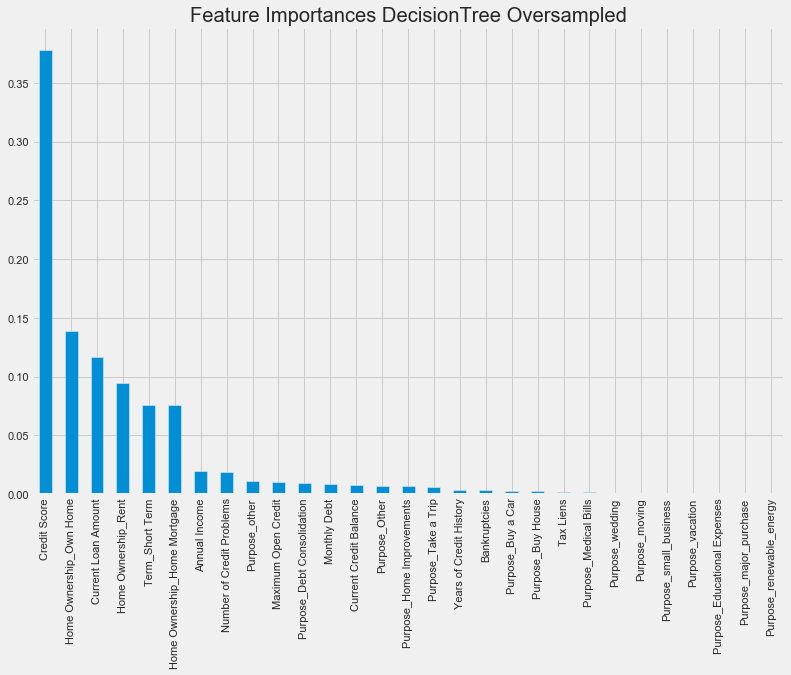

In [206]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
coef = pd.Series(dtreefeat.feature_importances_, oversampledX_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances DecisionTree Oversampled')

- Credit Score 
- Home ownership own home
- Current Loan amount
- Home ownership rent
- Term short term
- Home owner ship home mortgage
- Annual income


>### Model Evaluation

In [207]:
from sklearn.model_selection import cross_val_score

In [208]:
# function for prediction our dataset 
def find_CVS(features,target,model):
#     X_train, X_test, y_train, y_test = train_test_split(features,target,random_state=101)
    classification = model()
    score = cross_val_score(classification,features, target, cv=5).mean()
    return score

In [209]:
algorithm = [LogisticRegression,RandomForestClassifier,XGBClassifier,DecisionTreeClassifier]

In [210]:
all_CVS = []
for item in algorithm :
    score = find_CVS(oversampledX_train,oversampledy_train,item)
    all_CVS.append(score)

In [211]:
df_CVS = pd.DataFrame(all_CVS,index=[['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier' 
                                     ]],columns=['CVS'])
df_CVS

,CVS
LogisticRegression,0.654164
RandomForestClassifier,0.865478
XGBClassifier,0.843887
DecisionTreeClassifier,0.814148


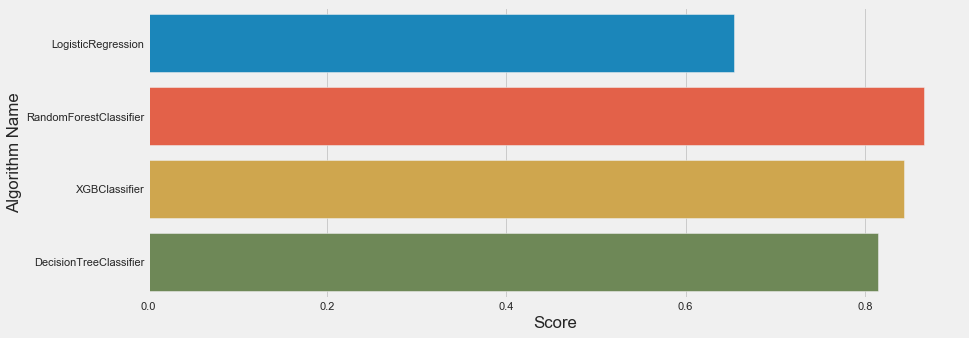

In [212]:
plt.figure(figsize=(13,5))
sns.barplot(y=['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier'], x=df_CVS['CVS'])
plt.xlabel('Score')
plt.ylabel('Algorithm Name')
plt.show()

In [213]:
from sklearn.metrics import accuracy_score, f1_score

In [214]:
def score_alogrithm(features,target,model):
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=101)
    clf = model()
    # Doing oversampling with SMOTE
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    
    # Evaluation Model SMOTE
    clf.fit(X_sm,y_sm)
    prediction_smote = clf.predict(X_sm)   
    accuracy_SMOTE = accuracy_score(y_sm,prediction_smote)
    f1_SMOTE = f1_score(y_sm,prediction_smote)
    
    # Evaluation Model Data Test
    prediction_test = clf.predict(X_test)   
    accuracy_test = accuracy_score(y_test,prediction_test)
    f1_test = f1_score(y_test,prediction_test)
    
    all_score = [accuracy_SMOTE,f1_SMOTE, accuracy_test,f1_test]
    return all_score

In [215]:
all_score=[]
for item in algorithm :
    score = score_alogrithm(oversampledX_train,oversampledy_train,item)
    all_score.append(score)

In [216]:
df_score = pd.DataFrame(all_score,index=[['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier']],
                        columns=['accuracy_SMOTE','f1_SMOTE', 'accuracy_test','f1_test'])
df_score

,accuracy_SMOTE,f1_SMOTE,accuracy_test,f1_test
LogisticRegression,0.654003,0.594414,0.655871,0.600884
RandomForestClassifier,1.000000,1.000000,0.873184,0.882125
XGBClassifier,0.867899,0.878666,0.854603,0.866934
DecisionTreeClassifier,1.000000,1.000000,0.817762,0.818280


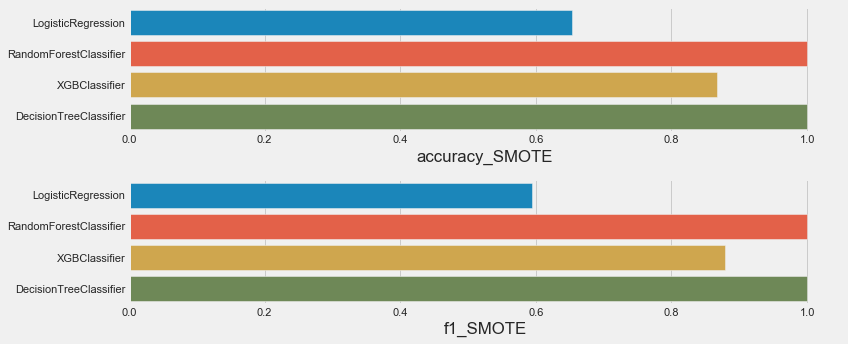

In [217]:
fig, ax = plt.subplots(2,1,figsize=(12,5))
sns.barplot(y=['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier'],
           x= df_score['accuracy_SMOTE'],ax=ax[0])

sns.barplot(y=['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier'],
           x= df_score['f1_SMOTE'],ax=ax[1])

plt.tight_layout()

>### Handling Imbalance Loan Status Fully Paid and Charges OFF with SMOTE (original data) fit_sample

In [218]:
def class_report_by_algo_SMOTE(features,target,model):
    from imblearn.over_sampling import SMOTE
    sm =SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(features,target)
    X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,random_state=101)
    classifcation = model()
    classifcation.fit(X_train,y_train)
    
    ## For describe model underfitting or Overfitting
    prediction_test = classifcation.predict(X_test)
    prediction_train = classifcation.predict(X_train)
    
    
    ## Evaluation Model 
    print('Classification for Data train')
    print(classification_report(y_train,prediction_train))
    print('=========================================================')
    print('Classification for Data Test')
    print(classification_report(y_test,prediction_test))

In [219]:
dfnewsm = pd.get_dummies(df,columns=['Term', 'Years in current job', 'Home Ownership', 'Purpose','Loan Status'],drop_first=True)
dfnewsm.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status_Fully Paid
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [220]:
dfnewsm['Loan Status_Fully Paid'].value_counts(normalize=True)

1    0.774768
0    0.225232
Name: Loan Status_Fully Paid, dtype: float64

In [221]:
featuressm = dfnewsm.drop('Loan Status_Fully Paid', axis=1)
targetsm = dfnewsm['Loan Status_Fully Paid']

In [222]:
featuressm

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,99999999.0,1076.456089,1.378277e+06,0.00,16.0,9.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100510,99999999.0,1076.456089,1.378277e+06,0.00,16.0,9.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100511,99999999.0,1076.456089,1.378277e+06,0.00,16.0,9.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100512,99999999.0,1076.456089,1.378277e+06,0.00,16.0,9.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
featuressm['Current Loan Amount'].unique()

array([  445412.,   262328., 99999999., ...,   486046.,   100254.,
         274076.])

In [224]:
class_report_by_algo_SMOTE(featuressm,targetsm,DecisionTreeClassifier)

Classification for Data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58519
           1       1.00      1.00      1.00     58293

    accuracy                           1.00    116812
   macro avg       1.00      1.00      1.00    116812
weighted avg       1.00      1.00      1.00    116812

Classification for Data Test
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     19356
           1       0.83      0.83      0.83     19582

    accuracy                           0.82     38938
   macro avg       0.82      0.82      0.82     38938
weighted avg       0.82      0.82      0.82     38938



In [225]:
class_report_by_algo_SMOTE(featuressm,targetsm,RandomForestClassifier)

Classification for Data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58519
           1       1.00      1.00      1.00     58293

    accuracy                           1.00    116812
   macro avg       1.00      1.00      1.00    116812
weighted avg       1.00      1.00      1.00    116812

Classification for Data Test
              precision    recall  f1-score   support

           0       0.95      0.79      0.87     19356
           1       0.82      0.96      0.89     19582

    accuracy                           0.88     38938
   macro avg       0.89      0.88      0.88     38938
weighted avg       0.89      0.88      0.88     38938



In [226]:
class_report_by_algo_SMOTE(featuressm,targetsm,LogisticRegression)

Classification for Data train
              precision    recall  f1-score   support

           0       0.62      0.80      0.70     58519
           1       0.72      0.51      0.59     58293

    accuracy                           0.65    116812
   macro avg       0.67      0.65      0.65    116812
weighted avg       0.67      0.65      0.65    116812

Classification for Data Test
              precision    recall  f1-score   support

           0       0.62      0.81      0.70     19356
           1       0.73      0.51      0.60     19582

    accuracy                           0.66     38938
   macro avg       0.67      0.66      0.65     38938
weighted avg       0.67      0.66      0.65     38938



In [227]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

featuressm.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in featuressm.columns.values]

In [228]:
class_report_by_algo_SMOTE(featuressm,targetsm,XGBClassifier)

Classification for Data train
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     58519
           1       0.83      0.98      0.90     58293

    accuracy                           0.89    116812
   macro avg       0.90      0.89      0.89    116812
weighted avg       0.90      0.89      0.89    116812

Classification for Data Test
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     19356
           1       0.82      0.96      0.89     19582

    accuracy                           0.88     38938
   macro avg       0.89      0.88      0.88     38938
weighted avg       0.89      0.88      0.88     38938



- Conclusion after modelling we have Randomforest and Xgb with the same result, accuracy 88%

>### feature Importance SMOTE (Original Data) Fit_sample

In [229]:
rfcfeat = RandomForestClassifier(random_state=101)
rfcfeat.fit(featuressm,targetsm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

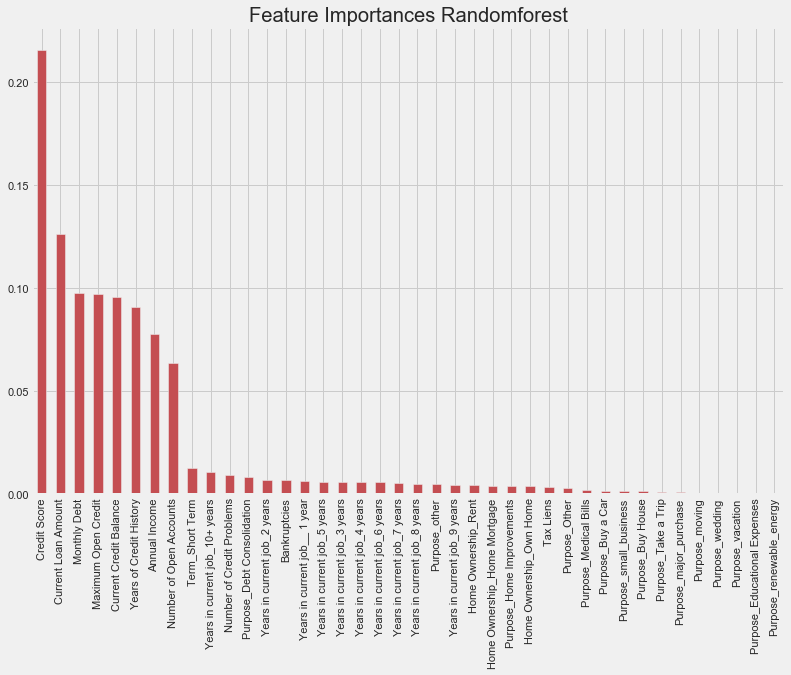

In [230]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
coef = pd.Series(rfcfeat.feature_importances_, featuressm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances Randomforest', color='r')

- Best feature:
    - Credit Score
    - Current loan amount
    - Monthly debt
    - Maximum open credit
    - Current credit balance
    - Years of credit history
    - Annual income
    - Number of open accounts

train_scores:

[[1.         0.99997513 1.         1.         1.        ]
 [1.         0.9999801  0.9999801  1.         1.        ]
 [1.         0.99998342 0.99998342 0.99998342 1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
test_scores:

[[0.81952942 0.81644531 0.81828583 0.82117097 0.81847577]
 [0.82047456 0.81719146 0.81888275 0.82027558 0.81907273]
 [0.82107148 0.81659454 0.81933045 0.8213202  0.8194707 ]
 [0.82231508 0.81763916 0.81853455 0.82236482 0.82016715]
 [0.82271303 0.81763916 0.81952942 0.82166841 0.81991842]]
[0.99999503 0.99999204 0.99999005 1.         1.        ]
[40205 50256 60308 70359 80411]


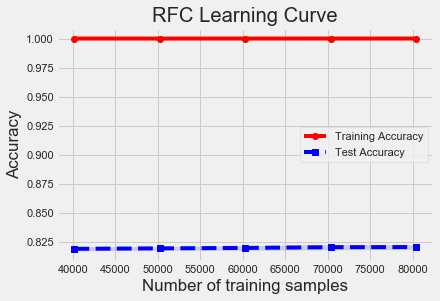

In [231]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=featuressm,
                                                       y=targetsm,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)

print('train_scores:\n')
print(train_scores)
print('test_scores:\n')
print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('RFC Learning Curve')
plt.legend()
plt.show()

- Add more data
     - Having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models.
       This will reduce your pain of working on limited data sets.

>### Model Evaluation 2

In [232]:
algorithmsm = [LogisticRegression,RandomForestClassifier,XGBClassifier,DecisionTreeClassifier]

In [233]:
all_CVSsm = []
for item in algorithmsm :
    scoresm = find_CVS(featuressm,targetsm,item)
    all_CVSsm.append(scoresm)

In [234]:
df_CVSsm = pd.DataFrame(all_CVSsm,index=[['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier' 
                                     ]],columns=['CVS sm'])
df_CVSsm

,CVS sm
LogisticRegression,0.815996
RandomForestClassifier,0.820463
XGBClassifier,0.820144
DecisionTreeClassifier,0.755308


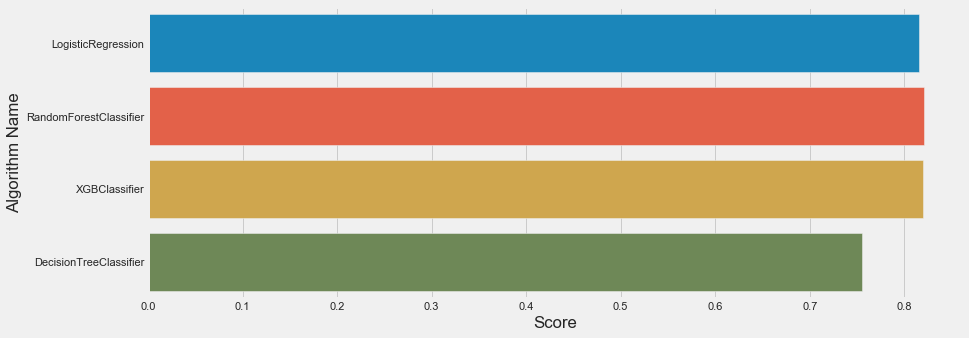

In [235]:
plt.figure(figsize=(13,5))
sns.barplot(y=['LogisticRegression','RandomForestClassifier','XGBClassifier','DecisionTreeClassifier'], x=df_CVSsm['CVS sm'])
plt.xlabel('Score')
plt.ylabel('Algorithm Name')
plt.show()

In [236]:
fsm_tsm = df[['Credit Score','Current Loan Amount','Number of Open Accounts','Purpose','Years in current job','Loan Status','Term']]

In [237]:
featuresm = fsm_tsm.drop(['Loan Status'], axis=1)
targetsm = fsm_tsm['Loan Status']
featuresm = pd.get_dummies(featuresm,drop_first=True)

>### Export Model

In [238]:
import pickle

In [239]:
# filename = 'finalized_model.sav'
# pickle.dump(rfcfeat, open(filename, 'wb'))

In [240]:
# filename = 'featuressm_dummies_colomn.sav'
# pickle.dump(featuressm.columns, open(filename , 'wb'))

In [241]:
# filename = 'real_colomn.sav'
# pickle.dump(fsm_tsm.drop('Loan Status', axis=1).columns, open(filename, 'wb'))

>### Export Clean Data

In [242]:
clean_data = df.copy()

In [243]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
Loan Status                  100514 non-null object
Current Loan Amount          100514 non-null float64
Term                         100514 non-null object
Credit Score                 100514 non-null float64
Annual Income                100514 non-null float64
Years in current job         100514 non-null object
Home Ownership               100514 non-null object
Purpose                      100514 non-null object
Monthly Debt                 100514 non-null float64
Years of Credit History      100514 non-null float64
Number of Open Accounts      100514 non-null float64
Number of Credit Problems    100514 non-null float64
Current Credit Balance       100514 non-null float64
Maximum Open Credit          100514 non-null float64
Bankruptcies                 100514 non-null float64
Tax Liens                    100514 non-null float64
dtypes: float64(11), object(5)
memory usage: 1

In [244]:
# clean_data.to_csv('bank_loans_clean_data.csv')

In [245]:
dfnewsm.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status_Fully Paid
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [246]:
clean_data['Loan Status'].value_counts()

Fully Paid     77875
Charged Off    22639
Name: Loan Status, dtype: int64

....................................................................................................

In [247]:
clean_data['Years in current job'].unique()


array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [248]:
clean_data['Term']

0         Short Term
1         Short Term
2         Short Term
3          Long Term
4         Short Term
             ...    
100509    Short Term
100510    Short Term
100511    Short Term
100512    Short Term
100513    Short Term
Name: Term, Length: 100514, dtype: object

In [249]:
clean_data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [250]:
df['Annual Income'].value_counts(ascending=True)

1.177297e+06        1
7.665170e+05        1
2.057339e+06        1
7.124620e+05        1
2.541877e+06        1
                ...  
9.694750e+05       18
1.140000e+06       18
9.733700e+05       19
1.162572e+06       22
1.378277e+06    19668
Name: Annual Income, Length: 36175, dtype: int64